# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 14485 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    0 of 14485) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 14485) |                    | Elapsed Time: 0:00:26 ETA: 11:43:08

  0% (   25 of 14485) |                     | Elapsed Time: 0:00:26 ETA: 4:14:55

  0% (   41 of 14485) |                     | Elapsed Time: 0:00:26 ETA: 2:36:33

  0% (   57 of 14485) |                     | Elapsed Time: 0:00:26 ETA: 1:53:24

  0% (   73 of 14485) |                     | Elapsed Time: 0:00:27 ETA: 0:03:14

  0% (   89 of 14485) |                     | Elapsed Time: 0:00:27 ETA: 0:03:13

  0% (  105 of 14485) |                     | Elapsed Time: 0:00:27 ETA: 0:03:12

  0% (  122 of 14485) |                     | Elapsed Time: 0:00:27 ETA: 0:03:07

  0% (  139 of 14485) |                     | Elapsed Time: 0:00:27 ETA: 0:03:04

  1% (  154 of 14485) |                     | Elapsed Time: 0:00:28 ETA: 0:03:05

  1% (  169 of 14485) |                     | Elapsed Time: 0:00:28 ETA: 0:03:12

  1% (  190 of 14485) |                     | Elapsed Time: 0:00:28 ETA: 0:03:12

  1% (  206 of 14485) |                     | Elapsed Time: 0:00:28 ETA: 0:03:19

  1% (  222 of 14485) |                     | Elapsed Time: 0:00:29 ETA: 0:03:19

  1% (  238 of 14485) |                     | Elapsed Time: 0:00:29 ETA: 0:03:12

  1% (  254 of 14485) |                     | Elapsed Time: 0:00:29 ETA: 0:03:11

  1% (  272 of 14485) |                     | Elapsed Time: 0:00:29 ETA: 0:03:05

  1% (  288 of 14485) |                     | Elapsed Time: 0:00:29 ETA: 0:03:03

  2% (  304 of 14485) |                     | Elapsed Time: 0:00:30 ETA: 0:03:02

  2% (  320 of 14485) |                     | Elapsed Time: 0:00:30 ETA: 0:03:01

  2% (  336 of 14485) |                     | Elapsed Time: 0:00:30 ETA: 0:03:03

  2% (  352 of 14485) |                     | Elapsed Time: 0:00:30 ETA: 0:03:06

  2% (  371 of 14485) |                     | Elapsed Time: 0:00:31 ETA: 0:03:05

  2% (  387 of 14485) |                     | Elapsed Time: 0:00:31 ETA: 0:03:05

  2% (  403 of 14485) |                     | Elapsed Time: 0:00:31 ETA: 0:03:05

  2% (  419 of 14485) |                     | Elapsed Time: 0:00:31 ETA: 0:03:06

  3% (  435 of 14485) |                     | Elapsed Time: 0:00:31 ETA: 0:03:06

  3% (  451 of 14485) |                     | Elapsed Time: 0:00:32 ETA: 0:03:06

  3% (  467 of 14485) |                     | Elapsed Time: 0:00:32 ETA: 0:03:05

  3% (  483 of 14485) |                     | Elapsed Time: 0:00:32 ETA: 0:03:05

  3% (  499 of 14485) |                     | Elapsed Time: 0:00:32 ETA: 0:03:04

  3% (  515 of 14485) |                     | Elapsed Time: 0:00:32 ETA: 0:03:03

  3% (  531 of 14485) |                     | Elapsed Time: 0:00:33 ETA: 0:03:01

  3% (  552 of 14485) |                     | Elapsed Time: 0:00:33 ETA: 0:03:00

  3% (  568 of 14485) |                     | Elapsed Time: 0:00:33 ETA: 0:03:00

  4% (  584 of 14485) |                     | Elapsed Time: 0:00:33 ETA: 0:02:58

  4% (  600 of 14485) |                     | Elapsed Time: 0:00:34 ETA: 0:02:58

  4% (  616 of 14485) |                     | Elapsed Time: 0:00:34 ETA: 0:02:58

  4% (  631 of 14485) |                     | Elapsed Time: 0:00:34 ETA: 0:03:00

  4% (  647 of 14485) |                     | Elapsed Time: 0:00:34 ETA: 0:03:03

  4% (  661 of 14485) |                     | Elapsed Time: 0:00:34 ETA: 0:03:08

  4% (  678 of 14485) |                     | Elapsed Time: 0:00:35 ETA: 0:03:06

  4% (  694 of 14485) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:06

  4% (  710 of 14485) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:04

  5% (  725 of 14485) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:03

  5% (  741 of 14485) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:01

  5% (  757 of 14485) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:04

  5% (  773 of 14485) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:05

  5% (  789 of 14485) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:06

  5% (  805 of 14485) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:07

  5% (  821 of 14485) |#                    | Elapsed Time: 0:00:37 ETA: 0:03:06

  5% (  837 of 14485) |#                    | Elapsed Time: 0:00:37 ETA: 0:03:06

  5% (  853 of 14485) |#                    | Elapsed Time: 0:00:37 ETA: 0:03:05

  5% (  869 of 14485) |#                    | Elapsed Time: 0:00:37 ETA: 0:03:03

  6% (  887 of 14485) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:57

  6% (  906 of 14485) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:54

  6% (  922 of 14485) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:54

  6% (  938 of 14485) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:56

  6% (  953 of 14485) |#                    | Elapsed Time: 0:00:38 ETA: 0:03:00

  6% (  969 of 14485) |#                    | Elapsed Time: 0:00:38 ETA: 0:03:05

  6% (  985 of 14485) |#                    | Elapsed Time: 0:00:39 ETA: 0:03:07

  6% (  998 of 14485) |#                    | Elapsed Time: 0:00:39 ETA: 0:03:12

  7% ( 1015 of 14485) |#                    | Elapsed Time: 0:00:39 ETA: 0:03:07

  7% ( 1033 of 14485) |#                    | Elapsed Time: 0:00:39 ETA: 0:03:01

  7% ( 1049 of 14485) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:58

  7% ( 1057 of 14485) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:57

  7% ( 1073 of 14485) |#                    | Elapsed Time: 0:00:41 ETA: 0:05:08

  7% ( 1095 of 14485) |#                    | Elapsed Time: 0:00:41 ETA: 0:05:02

  7% ( 1112 of 14485) |#                    | Elapsed Time: 0:00:41 ETA: 0:05:05

  7% ( 1130 of 14485) |#                    | Elapsed Time: 0:00:41 ETA: 0:04:59

  7% ( 1148 of 14485) |#                    | Elapsed Time: 0:00:42 ETA: 0:02:49

  8% ( 1164 of 14485) |#                    | Elapsed Time: 0:00:42 ETA: 0:02:46

  8% ( 1188 of 14485) |#                    | Elapsed Time: 0:00:42 ETA: 0:02:45

  8% ( 1205 of 14485) |#                    | Elapsed Time: 0:00:42 ETA: 0:02:44

  8% ( 1221 of 14485) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:48

  8% ( 1238 of 14485) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:47

  8% ( 1254 of 14485) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:47

  8% ( 1276 of 14485) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:52

  8% ( 1291 of 14485) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:57

  9% ( 1307 of 14485) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:57

  9% ( 1323 of 14485) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:59

  9% ( 1339 of 14485) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:59

  9% ( 1355 of 14485) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:56

  9% ( 1372 of 14485) |#                    | Elapsed Time: 0:00:45 ETA: 0:02:53

  9% ( 1389 of 14485) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:50

  9% ( 1404 of 14485) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:51

  9% ( 1419 of 14485) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:51

  9% ( 1435 of 14485) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:50

 10% ( 1456 of 14485) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:55

 10% ( 1471 of 14485) |##                   | Elapsed Time: 0:00:46 ETA: 0:03:01

 10% ( 1486 of 14485) |##                   | Elapsed Time: 0:00:46 ETA: 0:03:00

 10% ( 1502 of 14485) |##                   | Elapsed Time: 0:00:46 ETA: 0:03:01

 10% ( 1518 of 14485) |##                   | Elapsed Time: 0:00:47 ETA: 0:03:03

 10% ( 1535 of 14485) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:57

 10% ( 1552 of 14485) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:51

 10% ( 1568 of 14485) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:50

 10% ( 1585 of 14485) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:47

 11% ( 1600 of 14485) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:47

 11% ( 1617 of 14485) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:47

 11% ( 1638 of 14485) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:51

 11% ( 1654 of 14485) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:53

 11% ( 1672 of 14485) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:46

 11% ( 1688 of 14485) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:46

 11% ( 1703 of 14485) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:48

 11% ( 1717 of 14485) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:49

 11% ( 1733 of 14485) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:52

 12% ( 1749 of 14485) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:55

 12% ( 1764 of 14485) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:59

 12% ( 1779 of 14485) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:57

 12% ( 1794 of 14485) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:57

 12% ( 1811 of 14485) |##                   | Elapsed Time: 0:00:50 ETA: 0:03:00

 12% ( 1826 of 14485) |##                   | Elapsed Time: 0:00:51 ETA: 0:03:01

 12% ( 1842 of 14485) |##                   | Elapsed Time: 0:00:51 ETA: 0:03:01

 12% ( 1858 of 14485) |##                   | Elapsed Time: 0:00:51 ETA: 0:03:01

 12% ( 1875 of 14485) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:57

 13% ( 1891 of 14485) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:54

 13% ( 1908 of 14485) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:49

 13% ( 1925 of 14485) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:44

 13% ( 1941 of 14485) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:41

 13% ( 1957 of 14485) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:41

 13% ( 1972 of 14485) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:46

 13% ( 1992 of 14485) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:45

 13% ( 2008 of 14485) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:48

 13% ( 2024 of 14485) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:49

 14% ( 2040 of 14485) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:48

 14% ( 2056 of 14485) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:45

 14% ( 2072 of 14485) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:47

 14% ( 2088 of 14485) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:46

 14% ( 2104 of 14485) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:45

 14% ( 2120 of 14485) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:45

 14% ( 2137 of 14485) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:42

 14% ( 2153 of 14485) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:40

 15% ( 2173 of 14485) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:36

 15% ( 2189 of 14485) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:38

 15% ( 2205 of 14485) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:37

 15% ( 2221 of 14485) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:39

 15% ( 2238 of 14485) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:39

 15% ( 2253 of 14485) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:40

 15% ( 2269 of 14485) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:41

 15% ( 2284 of 14485) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:42

 15% ( 2301 of 14485) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:41

 16% ( 2319 of 14485) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:41

 16% ( 2335 of 14485) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:36

 16% ( 2354 of 14485) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:35

 16% ( 2367 of 14485) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:40

 16% ( 2381 of 14485) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:49

 16% ( 2396 of 14485) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:52

 16% ( 2412 of 14485) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:52

 16% ( 2428 of 14485) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:47

 16% ( 2444 of 14485) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:40

 16% ( 2460 of 14485) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:34

 17% ( 2476 of 14485) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:34

 17% ( 2493 of 14485) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:34

 17% ( 2510 of 14485) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:33

 17% ( 2535 of 14485) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:31

 17% ( 2552 of 14485) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:31

 17% ( 2568 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:32

 17% ( 2584 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:32

 17% ( 2600 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:34

 18% ( 2616 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:37

 18% ( 2632 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:38

 18% ( 2648 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:38

 18% ( 2662 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:41

 18% ( 2677 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:42

 18% ( 2695 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:39

 18% ( 2716 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:37

 18% ( 2732 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:36

 18% ( 2748 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:32

 19% ( 2762 of 14485) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:38

 19% ( 2775 of 14485) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:49

 19% ( 2789 of 14485) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:56

 19% ( 2803 of 14485) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:04

 19% ( 2817 of 14485) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:05

 19% ( 2831 of 14485) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:02

 19% ( 2847 of 14485) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:53

 19% ( 2865 of 14485) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:44

 19% ( 2880 of 14485) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:41

 20% ( 2897 of 14485) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:39

 20% ( 2912 of 14485) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:37

 20% ( 2927 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:42

 20% ( 2943 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:42

 20% ( 2958 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:41

 20% ( 2973 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:40

 20% ( 2989 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:38

 20% ( 3005 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:35

 20% ( 3021 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:33

 20% ( 3036 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:32

 21% ( 3052 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:30

 21% ( 3069 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:29

 21% ( 3087 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:29

 21% ( 3104 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:26

 21% ( 3121 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:24

 21% ( 3138 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:24

 21% ( 3155 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:24

 21% ( 3173 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:22

 22% ( 3187 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:28

 22% ( 3204 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:27

 22% ( 3221 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:27

 22% ( 3237 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:29

 22% ( 3260 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:26

 22% ( 3277 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:23

 22% ( 3294 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:20

 22% ( 3312 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:18

 22% ( 3329 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:17

 23% ( 3345 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:20

 23% ( 3363 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:18

 23% ( 3379 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:20

 23% ( 3397 of 14485) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:19

 23% ( 3415 of 14485) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:14

 23% ( 3431 of 14485) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:16

 23% ( 3449 of 14485) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:18

 23% ( 3465 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:19

 24% ( 3482 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:21

 24% ( 3499 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:23

 24% ( 3514 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:24

 24% ( 3530 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:26

 24% ( 3545 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:29

 24% ( 3561 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:31

 24% ( 3575 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:33

 24% ( 3592 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:28

 24% ( 3609 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:24

 25% ( 3630 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:21

 25% ( 3646 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:19

 25% ( 3662 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:17

 25% ( 3679 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:17

 25% ( 3696 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:17

 25% ( 3712 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:18

 25% ( 3728 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:16

 25% ( 3743 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:18

 25% ( 3759 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:18

 26% ( 3775 of 14485) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:20

 26% ( 3792 of 14485) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:19

 26% ( 3811 of 14485) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:16

 26% ( 3829 of 14485) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:14

 26% ( 3847 of 14485) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:12

 26% ( 3864 of 14485) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:11

 26% ( 3882 of 14485) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:10

 26% ( 3900 of 14485) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:09

 27% ( 3917 of 14485) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:11

 27% ( 3935 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:09

 27% ( 3951 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:10

 27% ( 3967 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:13

 27% ( 3984 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:12

 27% ( 4002 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:11

 27% ( 4018 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:14

 27% ( 4034 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:15

 27% ( 4050 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:13

 28% ( 4066 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:15

 28% ( 4082 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:16

 28% ( 4097 of 14485) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:17

 28% ( 4114 of 14485) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:15

 28% ( 4132 of 14485) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:12

 28% ( 4147 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:04:28

 28% ( 4165 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:04:27

 28% ( 4181 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:04:20

 28% ( 4197 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:04:27

 29% ( 4214 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:02:12

 29% ( 4230 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:02:13

 29% ( 4246 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:13

 29% ( 4262 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:13

 29% ( 4278 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:13

 29% ( 4294 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:13

 29% ( 4309 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:15

 29% ( 4325 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:02:16

 30% ( 4346 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:02:17

 30% ( 4362 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:02:15

 30% ( 4379 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:02:12

 30% ( 4396 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:02:10

 30% ( 4412 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:02:09

 30% ( 4430 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:02:06

 30% ( 4446 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:02:07

 30% ( 4468 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:02:10

 30% ( 4482 of 14485) |######               | Elapsed Time: 0:01:27 ETA: 0:02:13

 31% ( 4496 of 14485) |######               | Elapsed Time: 0:01:27 ETA: 0:02:19

 31% ( 4510 of 14485) |######               | Elapsed Time: 0:01:27 ETA: 0:02:24

 31% ( 4527 of 14485) |######               | Elapsed Time: 0:01:27 ETA: 0:02:23

 31% ( 4544 of 14485) |######               | Elapsed Time: 0:01:28 ETA: 0:02:18

 31% ( 4560 of 14485) |######               | Elapsed Time: 0:01:28 ETA: 0:02:14

 31% ( 4576 of 14485) |######               | Elapsed Time: 0:01:28 ETA: 0:02:12

 31% ( 4591 of 14485) |######               | Elapsed Time: 0:01:28 ETA: 0:02:12

 31% ( 4607 of 14485) |######               | Elapsed Time: 0:01:28 ETA: 0:02:12

 31% ( 4623 of 14485) |######               | Elapsed Time: 0:01:29 ETA: 0:02:15

 32% ( 4639 of 14485) |######               | Elapsed Time: 0:01:29 ETA: 0:02:14

 32% ( 4655 of 14485) |######               | Elapsed Time: 0:01:29 ETA: 0:02:13

 32% ( 4671 of 14485) |######               | Elapsed Time: 0:01:29 ETA: 0:02:12

 32% ( 4689 of 14485) |######               | Elapsed Time: 0:01:29 ETA: 0:02:09

 32% ( 4708 of 14485) |######               | Elapsed Time: 0:01:30 ETA: 0:02:07

 32% ( 4725 of 14485) |######               | Elapsed Time: 0:01:30 ETA: 0:02:04

 32% ( 4740 of 14485) |######               | Elapsed Time: 0:01:30 ETA: 0:02:05

 32% ( 4756 of 14485) |######               | Elapsed Time: 0:01:30 ETA: 0:02:06

 32% ( 4772 of 14485) |######               | Elapsed Time: 0:01:31 ETA: 0:02:08

 33% ( 4789 of 14485) |######               | Elapsed Time: 0:01:31 ETA: 0:02:09

 33% ( 4806 of 14485) |######               | Elapsed Time: 0:01:31 ETA: 0:02:07

 33% ( 4823 of 14485) |######               | Elapsed Time: 0:01:31 ETA: 0:02:03

 33% ( 4839 of 14485) |#######              | Elapsed Time: 0:01:31 ETA: 0:02:04

 33% ( 4854 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:07

 33% ( 4868 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:11

 33% ( 4889 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:16

 33% ( 4906 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:11

 33% ( 4922 of 14485) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:10

 34% ( 4939 of 14485) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:04

 34% ( 4955 of 14485) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:01

 34% ( 4971 of 14485) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:04

 34% ( 4986 of 14485) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:05

 34% ( 5003 of 14485) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:04

 34% ( 5021 of 14485) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:02

 34% ( 5037 of 14485) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:00

 34% ( 5053 of 14485) |#######              | Elapsed Time: 0:01:34 ETA: 0:01:59

 35% ( 5070 of 14485) |#######              | Elapsed Time: 0:01:34 ETA: 0:01:58

 35% ( 5087 of 14485) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:59

 35% ( 5105 of 14485) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:56

 35% ( 5122 of 14485) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:55

 35% ( 5138 of 14485) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:55

 35% ( 5153 of 14485) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:57

 35% ( 5169 of 14485) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:00

 35% ( 5185 of 14485) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:02

 35% ( 5202 of 14485) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:01

 36% ( 5217 of 14485) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:04

 36% ( 5233 of 14485) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:00

 36% ( 5251 of 14485) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:00

 36% ( 5267 of 14485) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:01

 36% ( 5284 of 14485) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:00

 36% ( 5302 of 14485) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:56

 36% ( 5319 of 14485) |#######              | Elapsed Time: 0:01:38 ETA: 0:01:56

 36% ( 5336 of 14485) |#######              | Elapsed Time: 0:01:38 ETA: 0:01:55

 36% ( 5352 of 14485) |#######              | Elapsed Time: 0:01:38 ETA: 0:01:54

 37% ( 5369 of 14485) |#######              | Elapsed Time: 0:01:38 ETA: 0:01:55

 37% ( 5387 of 14485) |#######              | Elapsed Time: 0:01:38 ETA: 0:01:53

 37% ( 5404 of 14485) |#######              | Elapsed Time: 0:01:39 ETA: 0:01:53

 37% ( 5420 of 14485) |#######              | Elapsed Time: 0:01:39 ETA: 0:01:54

 37% ( 5440 of 14485) |#######              | Elapsed Time: 0:01:39 ETA: 0:01:54

 37% ( 5456 of 14485) |#######              | Elapsed Time: 0:01:39 ETA: 0:01:55

 37% ( 5472 of 14485) |#######              | Elapsed Time: 0:01:40 ETA: 0:01:57

 37% ( 5488 of 14485) |#######              | Elapsed Time: 0:01:40 ETA: 0:01:57

 37% ( 5504 of 14485) |#######              | Elapsed Time: 0:01:40 ETA: 0:01:58

 38% ( 5521 of 14485) |########             | Elapsed Time: 0:01:40 ETA: 0:01:57

 38% ( 5537 of 14485) |########             | Elapsed Time: 0:01:40 ETA: 0:01:58

 38% ( 5553 of 14485) |########             | Elapsed Time: 0:01:41 ETA: 0:01:58

 38% ( 5569 of 14485) |########             | Elapsed Time: 0:01:41 ETA: 0:01:57

 38% ( 5585 of 14485) |########             | Elapsed Time: 0:01:41 ETA: 0:01:56

 38% ( 5600 of 14485) |########             | Elapsed Time: 0:01:41 ETA: 0:01:57

 38% ( 5621 of 14485) |########             | Elapsed Time: 0:01:42 ETA: 0:01:56

 38% ( 5635 of 14485) |########             | Elapsed Time: 0:01:42 ETA: 0:01:59

 38% ( 5649 of 14485) |########             | Elapsed Time: 0:01:42 ETA: 0:02:03

 39% ( 5664 of 14485) |########             | Elapsed Time: 0:01:42 ETA: 0:02:04

 39% ( 5682 of 14485) |########             | Elapsed Time: 0:01:42 ETA: 0:01:58

 39% ( 5700 of 14485) |########             | Elapsed Time: 0:01:43 ETA: 0:01:57

 39% ( 5717 of 14485) |########             | Elapsed Time: 0:01:43 ETA: 0:01:52

 39% ( 5735 of 14485) |########             | Elapsed Time: 0:01:43 ETA: 0:01:47

 39% ( 5753 of 14485) |########             | Elapsed Time: 0:01:43 ETA: 0:01:45

 39% ( 5771 of 14485) |########             | Elapsed Time: 0:01:43 ETA: 0:01:44

 40% ( 5794 of 14485) |########             | Elapsed Time: 0:01:44 ETA: 0:01:43

 40% ( 5812 of 14485) |########             | Elapsed Time: 0:01:44 ETA: 0:01:43

 40% ( 5829 of 14485) |########             | Elapsed Time: 0:01:44 ETA: 0:01:43

 40% ( 5846 of 14485) |########             | Elapsed Time: 0:01:44 ETA: 0:01:45

 40% ( 5863 of 14485) |########             | Elapsed Time: 0:01:45 ETA: 0:01:46

 40% ( 5881 of 14485) |########             | Elapsed Time: 0:01:45 ETA: 0:01:46

 40% ( 5897 of 14485) |########             | Elapsed Time: 0:01:45 ETA: 0:01:49

 40% ( 5914 of 14485) |########             | Elapsed Time: 0:01:45 ETA: 0:01:49

 40% ( 5931 of 14485) |########             | Elapsed Time: 0:01:45 ETA: 0:01:49

 41% ( 5949 of 14485) |########             | Elapsed Time: 0:01:46 ETA: 0:01:48

 41% ( 5967 of 14485) |########             | Elapsed Time: 0:01:46 ETA: 0:01:46

 41% ( 5984 of 14485) |########             | Elapsed Time: 0:01:46 ETA: 0:01:45

 41% ( 6002 of 14485) |########             | Elapsed Time: 0:01:46 ETA: 0:01:45

 41% ( 6019 of 14485) |########             | Elapsed Time: 0:01:47 ETA: 0:01:45

 41% ( 6035 of 14485) |########             | Elapsed Time: 0:01:47 ETA: 0:01:48

 41% ( 6053 of 14485) |########             | Elapsed Time: 0:01:47 ETA: 0:01:46

 41% ( 6070 of 14485) |########             | Elapsed Time: 0:01:47 ETA: 0:01:46

 42% ( 6087 of 14485) |########             | Elapsed Time: 0:01:47 ETA: 0:01:46

 42% ( 6100 of 14485) |########             | Elapsed Time: 0:01:48 ETA: 0:01:49

 42% ( 6117 of 14485) |########             | Elapsed Time: 0:01:48 ETA: 0:01:48

 42% ( 6133 of 14485) |########             | Elapsed Time: 0:01:48 ETA: 0:01:52

 42% ( 6149 of 14485) |########             | Elapsed Time: 0:01:48 ETA: 0:01:52

 42% ( 6165 of 14485) |########             | Elapsed Time: 0:01:48 ETA: 0:01:51

 42% ( 6182 of 14485) |########             | Elapsed Time: 0:01:49 ETA: 0:01:51

 42% ( 6199 of 14485) |########             | Elapsed Time: 0:01:49 ETA: 0:01:48

 42% ( 6217 of 14485) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:46

 43% ( 6235 of 14485) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:44

 43% ( 6253 of 14485) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:41

 43% ( 6268 of 14485) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:43

 43% ( 6283 of 14485) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:46

 43% ( 6299 of 14485) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:47

 43% ( 6314 of 14485) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:50

 43% ( 6338 of 14485) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:50

 43% ( 6354 of 14485) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:47

 43% ( 6370 of 14485) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:46

 44% ( 6387 of 14485) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:44

 44% ( 6405 of 14485) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:42

 44% ( 6422 of 14485) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:41

 44% ( 6438 of 14485) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:42

 44% ( 6454 of 14485) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:44

 44% ( 6470 of 14485) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:45

 44% ( 6487 of 14485) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:48

 44% ( 6504 of 14485) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:46

 45% ( 6528 of 14485) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:43

 45% ( 6546 of 14485) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:40

 45% ( 6564 of 14485) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:38

 45% ( 6578 of 14485) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:40

 45% ( 6595 of 14485) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:40

 45% ( 6612 of 14485) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:40

 45% ( 6628 of 14485) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:43

 45% ( 6644 of 14485) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:42

 45% ( 6660 of 14485) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:40

 46% ( 6677 of 14485) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:41

 46% ( 6700 of 14485) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:38

 46% ( 6716 of 14485) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:40

 46% ( 6731 of 14485) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:41

 46% ( 6747 of 14485) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:42

 46% ( 6764 of 14485) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:42

 46% ( 6782 of 14485) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:39

 46% ( 6804 of 14485) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:39

 47% ( 6821 of 14485) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:38

 47% ( 6839 of 14485) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:37

 47% ( 6856 of 14485) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:38

 47% ( 6872 of 14485) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:38

 47% ( 6890 of 14485) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:36

 47% ( 6908 of 14485) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:36

 47% ( 6923 of 14485) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:39

 47% ( 6937 of 14485) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:42

 47% ( 6951 of 14485) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:45

 48% ( 6966 of 14485) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:50

 48% ( 6982 of 14485) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:52

 48% ( 6997 of 14485) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:50

 48% ( 7013 of 14485) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:45

 48% ( 7029 of 14485) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:41

 48% ( 7046 of 14485) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:37

 48% ( 7070 of 14485) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:34

 48% ( 7086 of 14485) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:34

 49% ( 7102 of 14485) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:34

 49% ( 7120 of 14485) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:33

 49% ( 7136 of 14485) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:33

 49% ( 7153 of 14485) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:32

 49% ( 7169 of 14485) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:31

 49% ( 7184 of 14485) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:33

 49% ( 7200 of 14485) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:34

 49% ( 7218 of 14485) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:32

 49% ( 7234 of 14485) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:35

 50% ( 7251 of 14485) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:32

 50% ( 7267 of 14485) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:34

 50% ( 7282 of 14485) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:38

 50% ( 7298 of 14485) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:38

 50% ( 7314 of 14485) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:37

 50% ( 7332 of 14485) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:35

 50% ( 7348 of 14485) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:34

 50% ( 7365 of 14485) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:30

 50% ( 7382 of 14485) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:29

 51% ( 7399 of 14485) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:29

 51% ( 7416 of 14485) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:29

 51% ( 7432 of 14485) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:30

 51% ( 7448 of 14485) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:30

 51% ( 7471 of 14485) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:31

 51% ( 7488 of 14485) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:30

 51% ( 7506 of 14485) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:28

 51% ( 7522 of 14485) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:29

 52% ( 7538 of 14485) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:29

 52% ( 7555 of 14485) |##########           | Elapsed Time: 0:02:07 ETA: 0:01:27

 52% ( 7572 of 14485) |##########           | Elapsed Time: 0:02:07 ETA: 0:01:28

 52% ( 7588 of 14485) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:29

 52% ( 7613 of 14485) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:27

 52% ( 7630 of 14485) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:26

 52% ( 7646 of 14485) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:27

 52% ( 7664 of 14485) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:24

 53% ( 7681 of 14485) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:24

 53% ( 7699 of 14485) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:24

 53% ( 7715 of 14485) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:24

 53% ( 7729 of 14485) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:27

 53% ( 7745 of 14485) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:29

 53% ( 7761 of 14485) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:29

 53% ( 7779 of 14485) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:29

 53% ( 7793 of 14485) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:30

 53% ( 7809 of 14485) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:27

 54% ( 7825 of 14485) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:26

 54% ( 7840 of 14485) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:27

 54% ( 7856 of 14485) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:28

 54% ( 7872 of 14485) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:27

 54% ( 7888 of 14485) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:27

 54% ( 7905 of 14485) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:25

 54% ( 7922 of 14485) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:24

 54% ( 7937 of 14485) |###########          | Elapsed Time: 0:02:12 ETA: 0:01:24

 54% ( 7945 of 14485) |###########          | Elapsed Time: 0:02:12 ETA: 0:01:24

 54% ( 7955 of 14485) |###########          | Elapsed Time: 0:02:13 ETA: 0:03:28

 55% ( 7975 of 14485) |###########          | Elapsed Time: 0:02:13 ETA: 0:03:25

 55% ( 7991 of 14485) |###########          | Elapsed Time: 0:02:14 ETA: 0:03:27

 55% ( 8007 of 14485) |###########          | Elapsed Time: 0:02:14 ETA: 0:03:23

 55% ( 8024 of 14485) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:27

 55% ( 8040 of 14485) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:24

 55% ( 8056 of 14485) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:23

 55% ( 8072 of 14485) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:23

 55% ( 8088 of 14485) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:23

 55% ( 8103 of 14485) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:25

 56% ( 8120 of 14485) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:24

 56% ( 8137 of 14485) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:22

 56% ( 8155 of 14485) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:25

 56% ( 8170 of 14485) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:27

 56% ( 8187 of 14485) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:25

 56% ( 8202 of 14485) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:26

 56% ( 8219 of 14485) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:25

 56% ( 8236 of 14485) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:21

 56% ( 8253 of 14485) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:20

 57% ( 8269 of 14485) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:21

 57% ( 8285 of 14485) |############         | Elapsed Time: 0:02:17 ETA: 0:01:21

 57% ( 8301 of 14485) |############         | Elapsed Time: 0:02:18 ETA: 0:01:22

 57% ( 8317 of 14485) |############         | Elapsed Time: 0:02:18 ETA: 0:01:23

 57% ( 8338 of 14485) |############         | Elapsed Time: 0:02:18 ETA: 0:01:23

 57% ( 8353 of 14485) |############         | Elapsed Time: 0:02:18 ETA: 0:01:22

 57% ( 8371 of 14485) |############         | Elapsed Time: 0:02:19 ETA: 0:01:20

 57% ( 8388 of 14485) |############         | Elapsed Time: 0:02:19 ETA: 0:01:19

 58% ( 8405 of 14485) |############         | Elapsed Time: 0:02:19 ETA: 0:01:17

 58% ( 8421 of 14485) |############         | Elapsed Time: 0:02:19 ETA: 0:01:18

 58% ( 8436 of 14485) |############         | Elapsed Time: 0:02:19 ETA: 0:01:20

 58% ( 8454 of 14485) |############         | Elapsed Time: 0:02:20 ETA: 0:01:20

 58% ( 8469 of 14485) |############         | Elapsed Time: 0:02:20 ETA: 0:01:20

 58% ( 8485 of 14485) |############         | Elapsed Time: 0:02:20 ETA: 0:01:19

 58% ( 8510 of 14485) |############         | Elapsed Time: 0:02:20 ETA: 0:01:16

 58% ( 8528 of 14485) |############         | Elapsed Time: 0:02:21 ETA: 0:01:14

 58% ( 8546 of 14485) |############         | Elapsed Time: 0:02:21 ETA: 0:01:13

 59% ( 8563 of 14485) |############         | Elapsed Time: 0:02:21 ETA: 0:01:11

 59% ( 8579 of 14485) |############         | Elapsed Time: 0:02:21 ETA: 0:01:12

 59% ( 8596 of 14485) |############         | Elapsed Time: 0:02:21 ETA: 0:01:13

 59% ( 8612 of 14485) |############         | Elapsed Time: 0:02:22 ETA: 0:01:14

 59% ( 8628 of 14485) |############         | Elapsed Time: 0:02:22 ETA: 0:01:15

 59% ( 8644 of 14485) |############         | Elapsed Time: 0:02:22 ETA: 0:01:14

 59% ( 8660 of 14485) |############         | Elapsed Time: 0:02:22 ETA: 0:01:14

 59% ( 8677 of 14485) |############         | Elapsed Time: 0:02:22 ETA: 0:01:13

 60% ( 8699 of 14485) |############         | Elapsed Time: 0:02:23 ETA: 0:01:12

 60% ( 8717 of 14485) |############         | Elapsed Time: 0:02:23 ETA: 0:01:11

 60% ( 8734 of 14485) |############         | Elapsed Time: 0:02:23 ETA: 0:01:11

 60% ( 8750 of 14485) |############         | Elapsed Time: 0:02:23 ETA: 0:01:12

 60% ( 8767 of 14485) |############         | Elapsed Time: 0:02:24 ETA: 0:01:12

 60% ( 8784 of 14485) |############         | Elapsed Time: 0:02:24 ETA: 0:01:12

 60% ( 8801 of 14485) |############         | Elapsed Time: 0:02:24 ETA: 0:01:12

 60% ( 8818 of 14485) |############         | Elapsed Time: 0:02:24 ETA: 0:01:11

 60% ( 8834 of 14485) |############         | Elapsed Time: 0:02:24 ETA: 0:01:11

 61% ( 8851 of 14485) |############         | Elapsed Time: 0:02:25 ETA: 0:01:10

 61% ( 8873 of 14485) |############         | Elapsed Time: 0:02:25 ETA: 0:01:11

 61% ( 8889 of 14485) |############         | Elapsed Time: 0:02:25 ETA: 0:01:11

 61% ( 8907 of 14485) |############         | Elapsed Time: 0:02:25 ETA: 0:01:10

 61% ( 8922 of 14485) |############         | Elapsed Time: 0:02:26 ETA: 0:01:11

 61% ( 8939 of 14485) |############         | Elapsed Time: 0:02:26 ETA: 0:01:11

 61% ( 8957 of 14485) |############         | Elapsed Time: 0:02:26 ETA: 0:01:10

 61% ( 8974 of 14485) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:09

 62% ( 8989 of 14485) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:10

 62% ( 9007 of 14485) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:09

 62% ( 9025 of 14485) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:08

 62% ( 9043 of 14485) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:08

 62% ( 9062 of 14485) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:08

 62% ( 9079 of 14485) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:07

 62% ( 9096 of 14485) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:08

 62% ( 9111 of 14485) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:09

 63% ( 9126 of 14485) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:10

 63% ( 9142 of 14485) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:10

 63% ( 9159 of 14485) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:10

 63% ( 9175 of 14485) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:09

 63% ( 9192 of 14485) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:07

 63% ( 9209 of 14485) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:06

 63% ( 9225 of 14485) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:06

 63% ( 9242 of 14485) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:07

 63% ( 9257 of 14485) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:08

 64% ( 9274 of 14485) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:09

 64% ( 9292 of 14485) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:08

 64% ( 9308 of 14485) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:08

 64% ( 9323 of 14485) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:07

 64% ( 9341 of 14485) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:05

 64% ( 9358 of 14485) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:05

 64% ( 9374 of 14485) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:06

 64% ( 9391 of 14485) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:04

 64% ( 9407 of 14485) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:05

 65% ( 9424 of 14485) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:06

 65% ( 9441 of 14485) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:06

 65% ( 9457 of 14485) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:05

 65% ( 9474 of 14485) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:05

 65% ( 9490 of 14485) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:03

 65% ( 9508 of 14485) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:02

 65% ( 9524 of 14485) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:02

 65% ( 9540 of 14485) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:03

 65% ( 9557 of 14485) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:03

 66% ( 9575 of 14485) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:02

 66% ( 9597 of 14485) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:02

 66% ( 9614 of 14485) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:01

 66% ( 9631 of 14485) |#############        | Elapsed Time: 0:02:35 ETA: 0:01:00

 66% ( 9649 of 14485) |#############        | Elapsed Time: 0:02:35 ETA: 0:01:00

 66% ( 9666 of 14485) |##############       | Elapsed Time: 0:02:35 ETA: 0:01:00

 66% ( 9680 of 14485) |##############       | Elapsed Time: 0:02:35 ETA: 0:01:03

 66% ( 9698 of 14485) |##############       | Elapsed Time: 0:02:36 ETA: 0:01:02

 67% ( 9713 of 14485) |##############       | Elapsed Time: 0:02:36 ETA: 0:01:04

 67% ( 9726 of 14485) |##############       | Elapsed Time: 0:02:36 ETA: 0:01:08

 67% ( 9743 of 14485) |##############       | Elapsed Time: 0:02:36 ETA: 0:01:05

 67% ( 9760 of 14485) |##############       | Elapsed Time: 0:02:36 ETA: 0:01:04

 67% ( 9778 of 14485) |##############       | Elapsed Time: 0:02:37 ETA: 0:01:03

 67% ( 9794 of 14485) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:59

 67% ( 9810 of 14485) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:58

 67% ( 9827 of 14485) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:59

 67% ( 9843 of 14485) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:59

 68% ( 9860 of 14485) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:58

 68% ( 9876 of 14485) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:59

 68% ( 9892 of 14485) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:59

 68% ( 9908 of 14485) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:59

 68% ( 9924 of 14485) |##############       | Elapsed Time: 0:02:39 ETA: 0:00:59

 68% ( 9940 of 14485) |##############       | Elapsed Time: 0:02:39 ETA: 0:01:00

 68% ( 9959 of 14485) |##############       | Elapsed Time: 0:02:39 ETA: 0:00:59

 68% ( 9976 of 14485) |##############       | Elapsed Time: 0:02:39 ETA: 0:00:58

 68% ( 9992 of 14485) |##############       | Elapsed Time: 0:02:39 ETA: 0:00:58

 69% (10008 of 14485) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:58

 69% (10026 of 14485) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:56

 69% (10044 of 14485) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:56

 69% (10061 of 14485) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:56

 69% (10075 of 14485) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:57

 69% (10092 of 14485) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:58

 69% (10109 of 14485) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:57

 69% (10125 of 14485) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:58

 70% (10148 of 14485) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:56

 70% (10164 of 14485) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:55

 70% (10180 of 14485) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:55

 70% (10195 of 14485) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:56

 70% (10211 of 14485) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:56

 70% (10227 of 14485) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:57

 70% (10243 of 14485) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:57

 70% (10260 of 14485) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:55

 70% (10277 of 14485) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:54

 71% (10295 of 14485) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:53

 71% (10310 of 14485) |##############       | Elapsed Time: 0:02:44 ETA: 0:00:53

 71% (10329 of 14485) |##############       | Elapsed Time: 0:02:44 ETA: 0:00:53

 71% (10345 of 14485) |##############       | Elapsed Time: 0:02:44 ETA: 0:00:54

 71% (10361 of 14485) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:55

 71% (10377 of 14485) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:55

 71% (10393 of 14485) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:54

 71% (10411 of 14485) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:53

 71% (10426 of 14485) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:53

 72% (10444 of 14485) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:51

 72% (10461 of 14485) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:51

 72% (10476 of 14485) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:52

 72% (10488 of 14485) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:54

 72% (10510 of 14485) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:54

 72% (10526 of 14485) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:55

 72% (10541 of 14485) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:56

 72% (10557 of 14485) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:54

 72% (10574 of 14485) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:51

 73% (10591 of 14485) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:51

 73% (10608 of 14485) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:50

 73% (10625 of 14485) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:48

 73% (10642 of 14485) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:48

 73% (10659 of 14485) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:47

 73% (10683 of 14485) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:48

 73% (10700 of 14485) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:47

 73% (10718 of 14485) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:47

 74% (10735 of 14485) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:47

 74% (10751 of 14485) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:47

 74% (10769 of 14485) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:47

 74% (10787 of 14485) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:46

 74% (10803 of 14485) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:47

 74% (10819 of 14485) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:47

 74% (10836 of 14485) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:46

 74% (10853 of 14485) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:46

 75% (10873 of 14485) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:45

 75% (10890 of 14485) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:44

 75% (10908 of 14485) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:44

 75% (10924 of 14485) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:45

 75% (10941 of 14485) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:44

 75% (10958 of 14485) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:44

 75% (10976 of 14485) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:44

 75% (10992 of 14485) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:44

 76% (11009 of 14485) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:43

 76% (11026 of 14485) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:42

 76% (11045 of 14485) |################     | Elapsed Time: 0:02:53 ETA: 0:00:43

 76% (11061 of 14485) |################     | Elapsed Time: 0:02:53 ETA: 0:00:43

 76% (11078 of 14485) |################     | Elapsed Time: 0:02:53 ETA: 0:00:43

 76% (11095 of 14485) |################     | Elapsed Time: 0:02:54 ETA: 0:00:44

 76% (11112 of 14485) |################     | Elapsed Time: 0:02:54 ETA: 0:00:43

 76% (11130 of 14485) |################     | Elapsed Time: 0:02:54 ETA: 0:00:42

 76% (11147 of 14485) |################     | Elapsed Time: 0:02:54 ETA: 0:00:42

 77% (11161 of 14485) |################     | Elapsed Time: 0:02:55 ETA: 0:00:43

 77% (11177 of 14485) |################     | Elapsed Time: 0:02:55 ETA: 0:00:42

 77% (11194 of 14485) |################     | Elapsed Time: 0:02:55 ETA: 0:00:42

 77% (11211 of 14485) |################     | Elapsed Time: 0:02:55 ETA: 0:00:43

 77% (11233 of 14485) |################     | Elapsed Time: 0:02:55 ETA: 0:00:42

 77% (11248 of 14485) |################     | Elapsed Time: 0:02:56 ETA: 0:00:42

 77% (11264 of 14485) |################     | Elapsed Time: 0:02:56 ETA: 0:00:42

 77% (11280 of 14485) |################     | Elapsed Time: 0:02:56 ETA: 0:00:43

 77% (11297 of 14485) |################     | Elapsed Time: 0:02:56 ETA: 0:00:43

 78% (11313 of 14485) |################     | Elapsed Time: 0:02:57 ETA: 0:00:42

 78% (11327 of 14485) |################     | Elapsed Time: 0:02:57 ETA: 0:00:42

 78% (11343 of 14485) |################     | Elapsed Time: 0:02:57 ETA: 0:00:42

 78% (11360 of 14485) |################     | Elapsed Time: 0:02:57 ETA: 0:00:42

 78% (11376 of 14485) |################     | Elapsed Time: 0:02:57 ETA: 0:00:42

 78% (11392 of 14485) |################     | Elapsed Time: 0:02:58 ETA: 0:00:41

 78% (11407 of 14485) |################     | Elapsed Time: 0:02:58 ETA: 0:00:41

 78% (11423 of 14485) |################     | Elapsed Time: 0:02:58 ETA: 0:00:41

 78% (11438 of 14485) |################     | Elapsed Time: 0:02:58 ETA: 0:00:41

 79% (11456 of 14485) |################     | Elapsed Time: 0:02:58 ETA: 0:00:40

 79% (11473 of 14485) |################     | Elapsed Time: 0:02:59 ETA: 0:00:39

 79% (11491 of 14485) |################     | Elapsed Time: 0:02:59 ETA: 0:00:38

 79% (11507 of 14485) |################     | Elapsed Time: 0:02:59 ETA: 0:00:37

 79% (11523 of 14485) |################     | Elapsed Time: 0:02:59 ETA: 0:00:37

 79% (11540 of 14485) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 79% (11556 of 14485) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 79% (11572 of 14485) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 80% (11588 of 14485) |################     | Elapsed Time: 0:03:00 ETA: 0:00:38

 80% (11605 of 14485) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 80% (11623 of 14485) |################     | Elapsed Time: 0:03:01 ETA: 0:00:36

 80% (11638 of 14485) |################     | Elapsed Time: 0:03:01 ETA: 0:00:37

 80% (11655 of 14485) |################     | Elapsed Time: 0:03:01 ETA: 0:00:36

 80% (11672 of 14485) |################     | Elapsed Time: 0:03:01 ETA: 0:00:35

 80% (11688 of 14485) |################     | Elapsed Time: 0:03:01 ETA: 0:00:35

 80% (11702 of 14485) |################     | Elapsed Time: 0:03:02 ETA: 0:00:36

 80% (11719 of 14485) |################     | Elapsed Time: 0:03:02 ETA: 0:00:35

 81% (11734 of 14485) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:36

 81% (11751 of 14485) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:36

 81% (11770 of 14485) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:35

 81% (11787 of 14485) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:34

 81% (11805 of 14485) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:34

 81% (11821 of 14485) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:34

 81% (11838 of 14485) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:34

 81% (11852 of 14485) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:35

 81% (11868 of 14485) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:35

 82% (11885 of 14485) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:34

 82% (11902 of 14485) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:34

 82% (11920 of 14485) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:32

 82% (11934 of 14485) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:33

 82% (11951 of 14485) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:33

 82% (11968 of 14485) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:33

 82% (11984 of 14485) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:33

 82% (12000 of 14485) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:33

 82% (12016 of 14485) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:32

 83% (12032 of 14485) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:32

 83% (12048 of 14485) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:32

 83% (12065 of 14485) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:31

 83% (12081 of 14485) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:31

 83% (12096 of 14485) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:31

 83% (12112 of 14485) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:31

 83% (12132 of 14485) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:30

 83% (12148 of 14485) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:30

 83% (12164 of 14485) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:30

 84% (12181 of 14485) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:29

 84% (12197 of 14485) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:29

 84% (12213 of 14485) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:29

 84% (12231 of 14485) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:28

 84% (12247 of 14485) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:29

 84% (12264 of 14485) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:29

 84% (12281 of 14485) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:28

 84% (12298 of 14485) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:28

 85% (12322 of 14485) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:27

 85% (12339 of 14485) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:27

 85% (12355 of 14485) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:26

 85% (12372 of 14485) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:26

 85% (12388 of 14485) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:26

 85% (12406 of 14485) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:26

 85% (12422 of 14485) |##################   | Elapsed Time: 0:03:11 ETA: 0:00:26

 85% (12438 of 14485) |##################   | Elapsed Time: 0:03:11 ETA: 0:00:25

 85% (12455 of 14485) |##################   | Elapsed Time: 0:03:11 ETA: 0:00:25

 86% (12471 of 14485) |##################   | Elapsed Time: 0:03:12 ETA: 0:00:25

 86% (12494 of 14485) |##################   | Elapsed Time: 0:03:12 ETA: 0:00:25

 86% (12511 of 14485) |##################   | Elapsed Time: 0:03:12 ETA: 0:00:24

 86% (12528 of 14485) |##################   | Elapsed Time: 0:03:12 ETA: 0:00:24

 86% (12544 of 14485) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:24

 86% (12560 of 14485) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:24

 86% (12578 of 14485) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:24

 86% (12595 of 14485) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:23

 87% (12611 of 14485) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:23

 87% (12620 of 14485) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:23

 87% (12636 of 14485) |##################   | Elapsed Time: 0:03:15 ETA: 0:01:00

 87% (12652 of 14485) |##################   | Elapsed Time: 0:03:15 ETA: 0:01:01

 87% (12675 of 14485) |##################   | Elapsed Time: 0:03:16 ETA: 0:01:01

 87% (12691 of 14485) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:58

 87% (12707 of 14485) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:23

 87% (12721 of 14485) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:24

 87% (12737 of 14485) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:24

 88% (12753 of 14485) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:24

 88% (12770 of 14485) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:23

 88% (12785 of 14485) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:23

 88% (12801 of 14485) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:22

 88% (12819 of 14485) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:21

 88% (12836 of 14485) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:21

 88% (12856 of 14485) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:21

 88% (12873 of 14485) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:21

 88% (12889 of 14485) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:21

 89% (12907 of 14485) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:20

 89% (12925 of 14485) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:20

 89% (12939 of 14485) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:20

 89% (12956 of 14485) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:19

 89% (12973 of 14485) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:19

 89% (12988 of 14485) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:20

 89% (13004 of 14485) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:19

 89% (13015 of 14485) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:21

 90% (13037 of 14485) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:20

 90% (13053 of 14485) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:20

 90% (13071 of 14485) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:19

 90% (13089 of 14485) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:18

 90% (13106 of 14485) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:17

 90% (13122 of 14485) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:17

 90% (13137 of 14485) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:17

 90% (13152 of 14485) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:17

 90% (13168 of 14485) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:17

 91% (13185 of 14485) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:17

 91% (13200 of 14485) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:17

 91% (13218 of 14485) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:17

 91% (13234 of 14485) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:16

 91% (13251 of 14485) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:16

 91% (13267 of 14485) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:16

 91% (13283 of 14485) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:15

 91% (13297 of 14485) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:15

 91% (13313 of 14485) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:15

 92% (13329 of 14485) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:15

 92% (13346 of 14485) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:15

 92% (13363 of 14485) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:14

 92% (13379 of 14485) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:14

 92% (13399 of 14485) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:14

 92% (13415 of 14485) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:13

 92% (13432 of 14485) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:13

 92% (13448 of 14485) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:13

 92% (13464 of 14485) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:13

 93% (13480 of 14485) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:12

 93% (13497 of 14485) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:12

 93% (13514 of 14485) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:12

 93% (13530 of 14485) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:12

 93% (13546 of 14485) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:12

 93% (13563 of 14485) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:11

 93% (13580 of 14485) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:11

 93% (13596 of 14485) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:11

 93% (13612 of 14485) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:11

 94% (13629 of 14485) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:11

 94% (13644 of 14485) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:11

 94% (13659 of 14485) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:11

 94% (13675 of 14485) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:10

 94% (13692 of 14485) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:10

 94% (13710 of 14485) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:10

 94% (13726 of 14485) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:09

 94% (13742 of 14485) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:09

 95% (13761 of 14485) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:09

 95% (13777 of 14485) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:09

 95% (13792 of 14485) |###################  | Elapsed Time: 0:03:31 ETA: 0:00:09

 95% (13808 of 14485) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:09

 95% (13824 of 14485) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:08

 95% (13839 of 14485) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:08

 95% (13855 of 14485) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:08

 95% (13873 of 14485) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:08

 95% (13888 of 14485) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:07

 95% (13905 of 14485) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:07

 96% (13921 of 14485) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:07

 96% (13942 of 14485) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:07

 96% (13958 of 14485) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:06

 96% (13975 of 14485) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:06

 96% (13992 of 14485) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:06

 96% (14009 of 14485) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:06

 96% (14025 of 14485) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:05

 96% (14042 of 14485) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:05

 97% (14060 of 14485) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:05

 97% (14084 of 14485) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:05

 97% (14100 of 14485) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:04

 97% (14115 of 14485) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:04

 97% (14131 of 14485) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:04

 97% (14147 of 14485) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:04

 97% (14163 of 14485) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:04

 97% (14180 of 14485) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:04

 98% (14196 of 14485) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:03

 98% (14211 of 14485) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:03

 98% (14227 of 14485) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:03

 98% (14245 of 14485) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:03

 98% (14262 of 14485) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:02

 98% (14279 of 14485) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:02

 98% (14295 of 14485) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:02

 98% (14312 of 14485) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:02

 98% (14329 of 14485) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:01

 99% (14345 of 14485) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:01

 99% (14360 of 14485) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:01

 99% (14377 of 14485) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:01

 99% (14393 of 14485) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:01

 99% (14409 of 14485) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:01

 99% (14425 of 14485) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:00

 99% (14440 of 14485) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:00

 99% (14456 of 14485) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:00

 99% (14472 of 14485) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:00

100% (14485 of 14485) |####################| Elapsed Time: 0:03:40 Time: 0:03:40


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *   |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | **  | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | **  | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | ns. | ns. | **  |


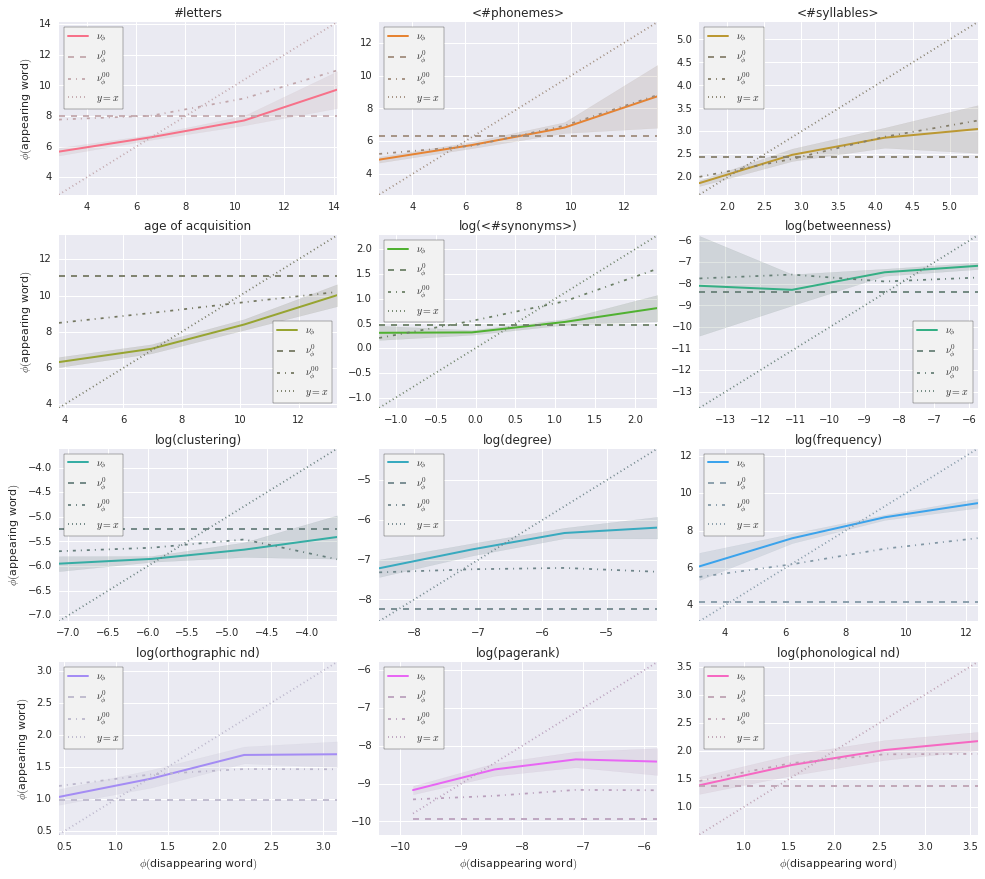

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

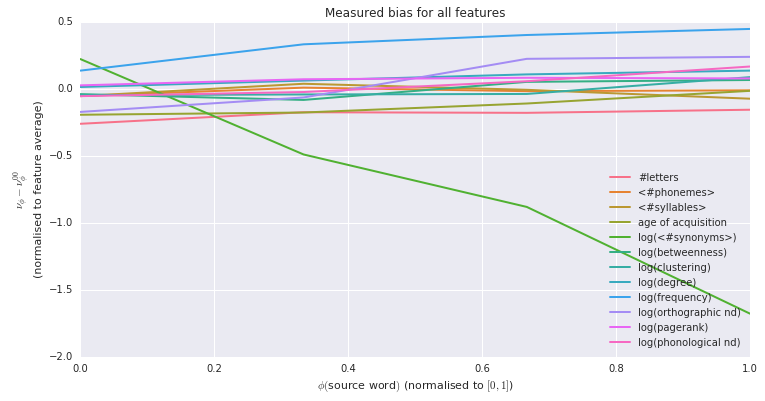

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | **  | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | **  | *   |


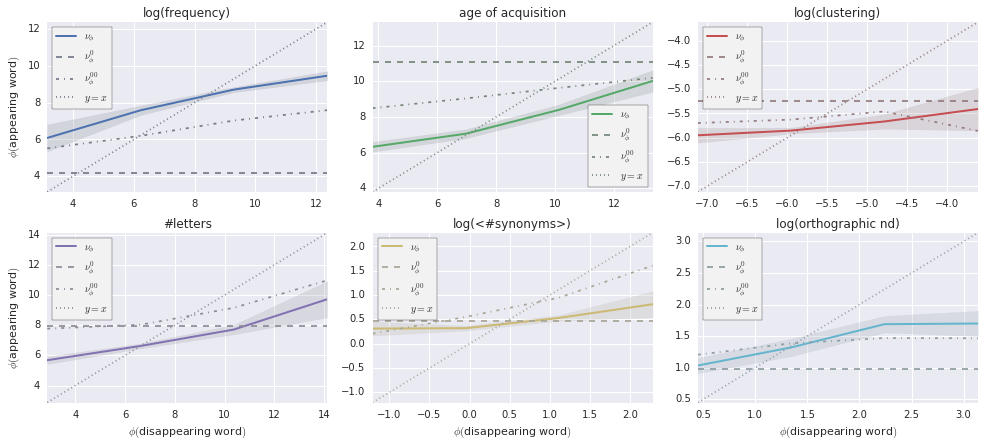

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

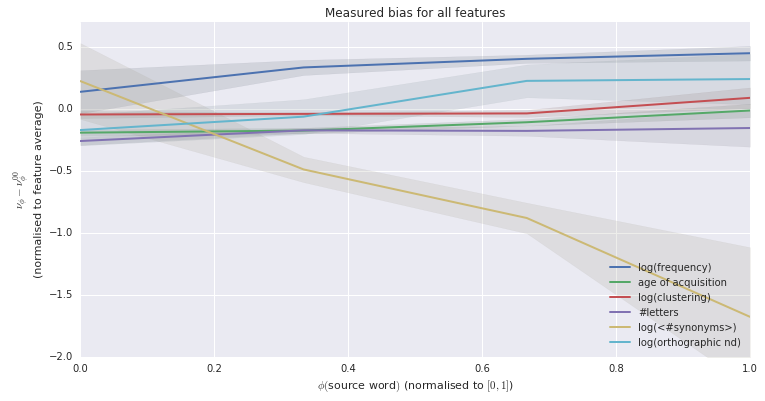

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | *** |
H_00 | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | ns. | ns. | **  |


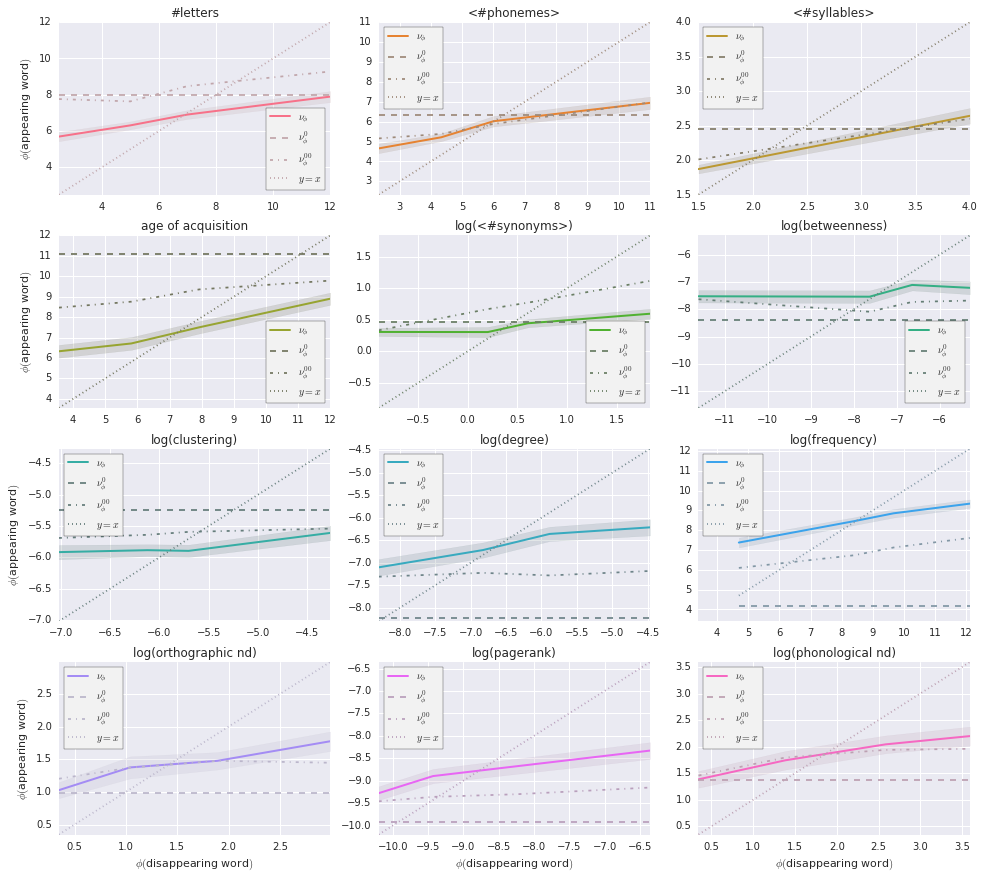

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

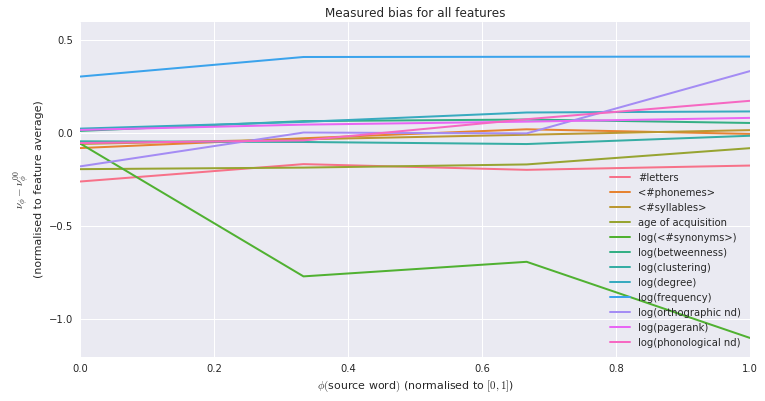

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |


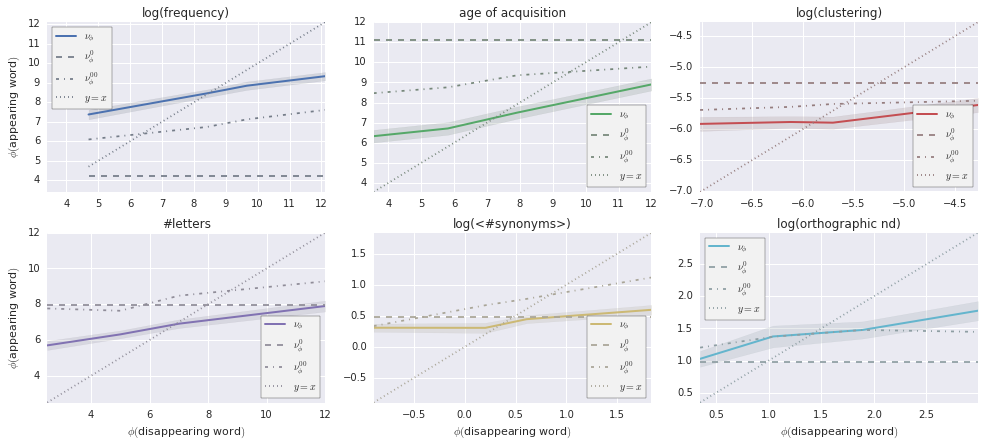

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

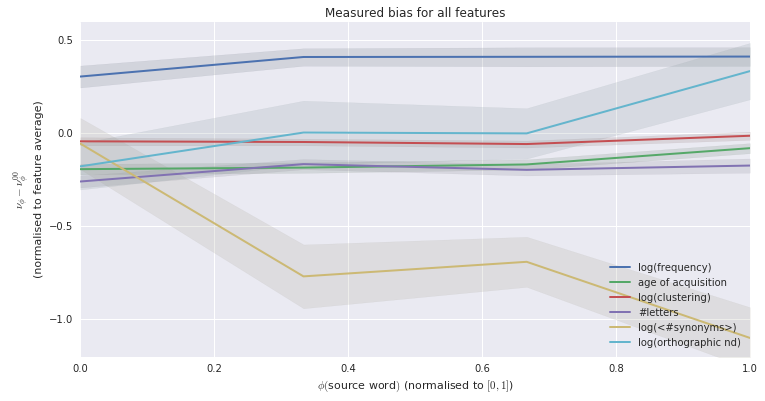

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | ns. |
H_00 | ns. | *** | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | ns. |
H_00 | ns. | *** | *** | **  |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | ns. | ns. | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | **  | *   | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | *   | ns. | ns. |


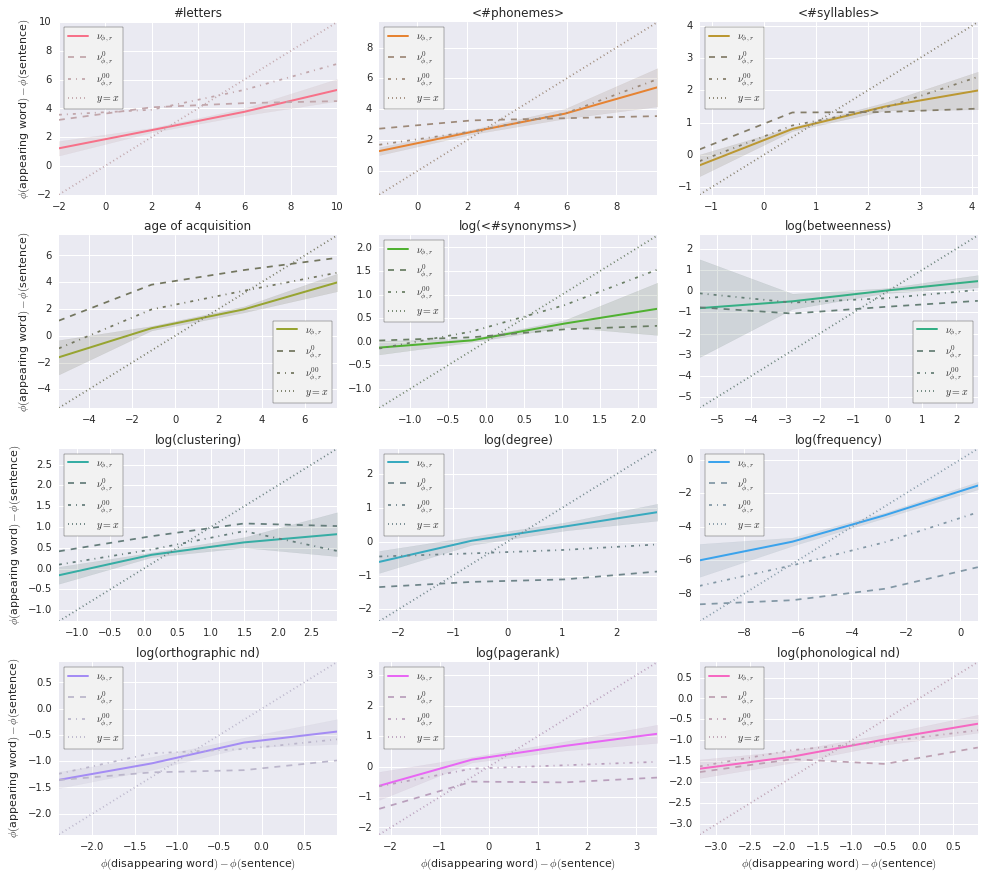

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

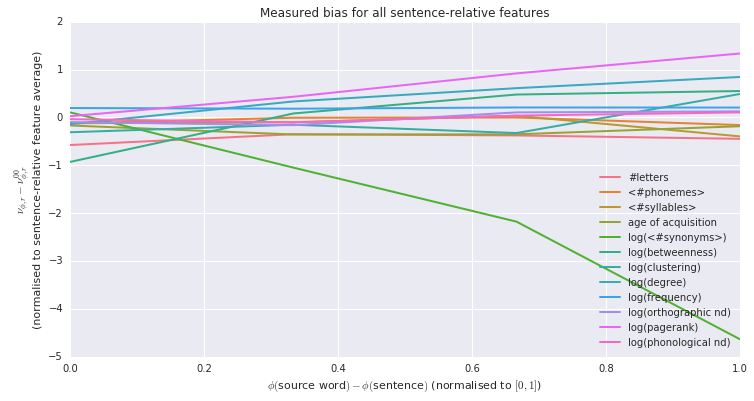

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *   | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | ns. |
H_00 | ns. | *** | *** | **  |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | **  | *** | *** |
H_00 | ns. | **  | *   | ns. |


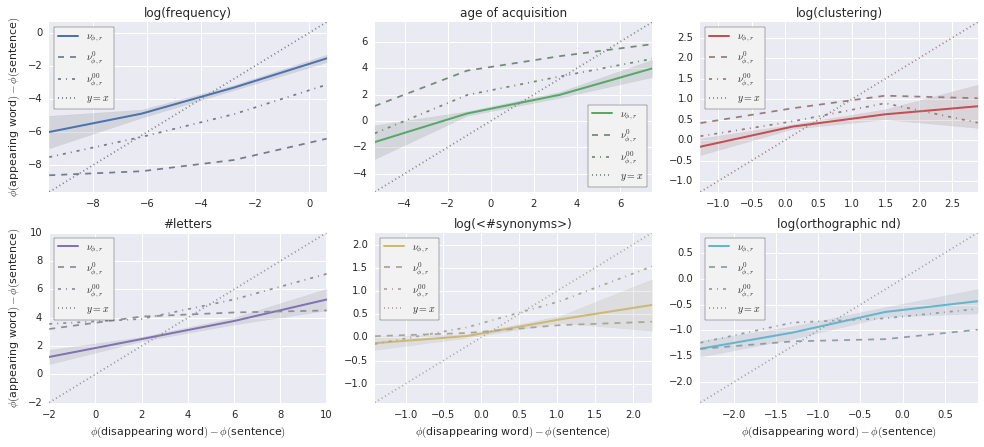

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

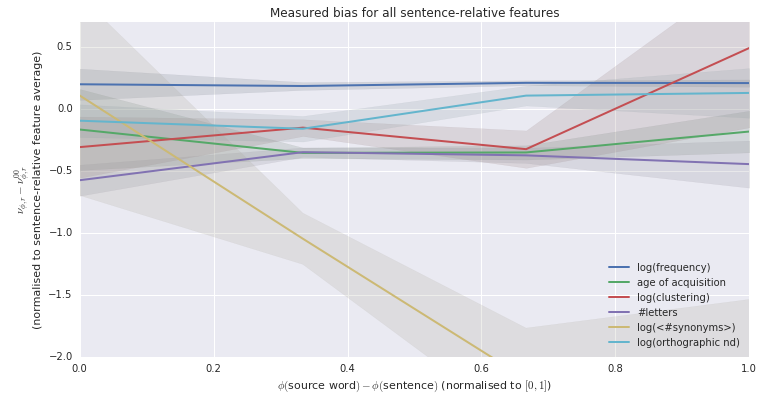

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | **  |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | *   | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | *   | ns. | ns. |


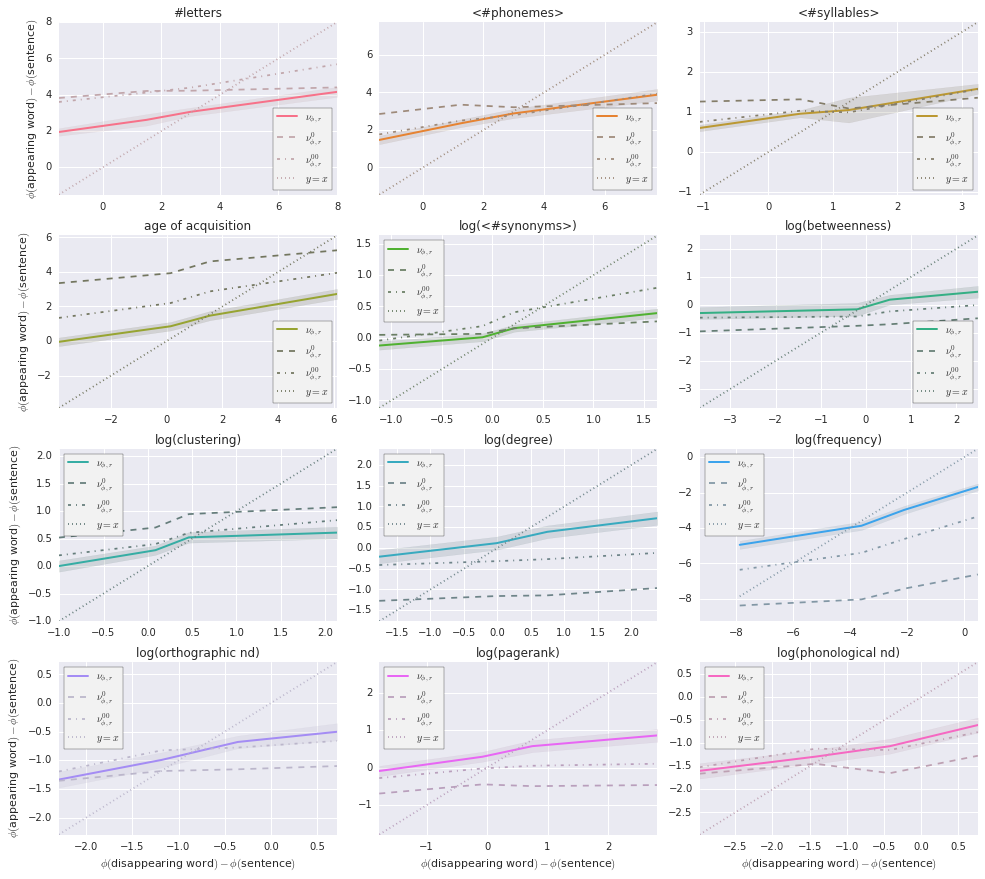

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

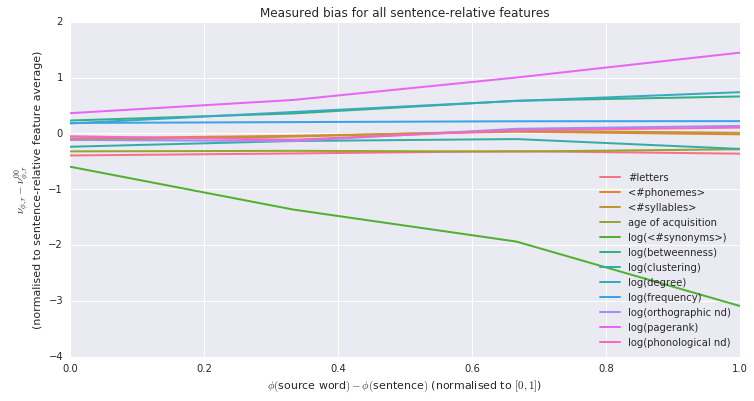

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *   | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | **  | *** | *** |
H_00 | *   | *   | ns. | *   |


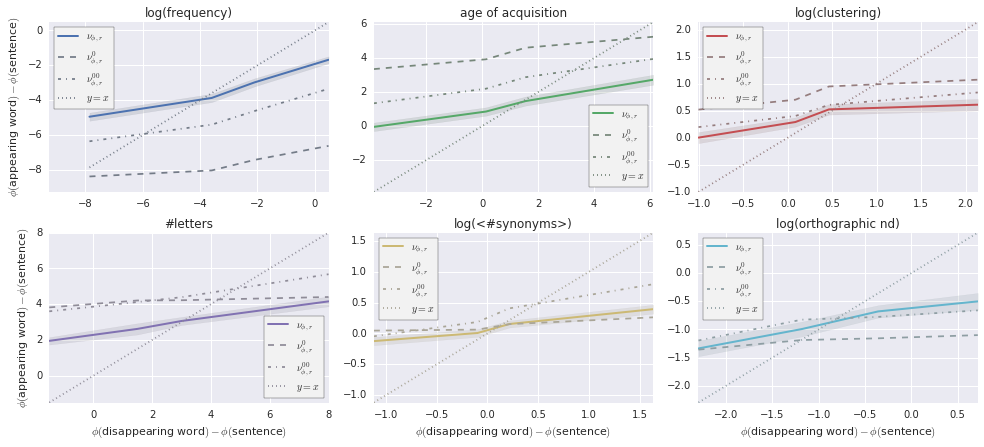

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

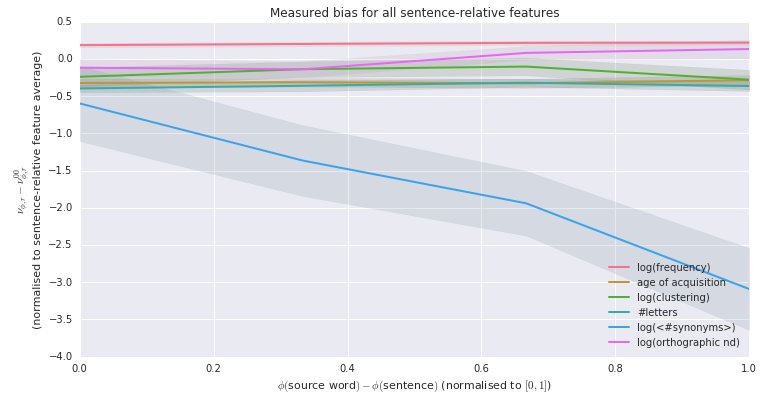

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


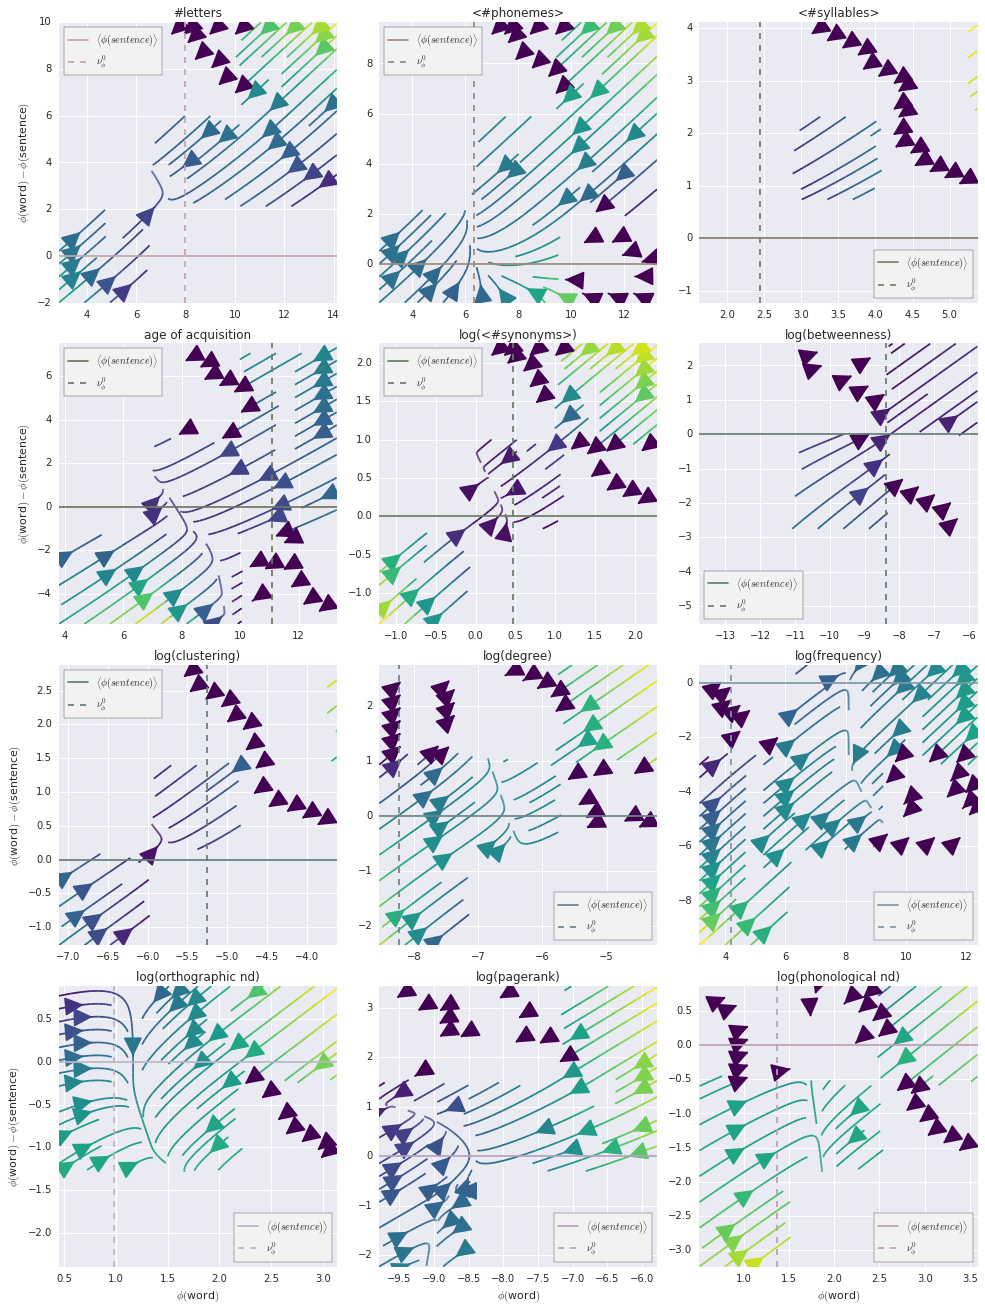

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


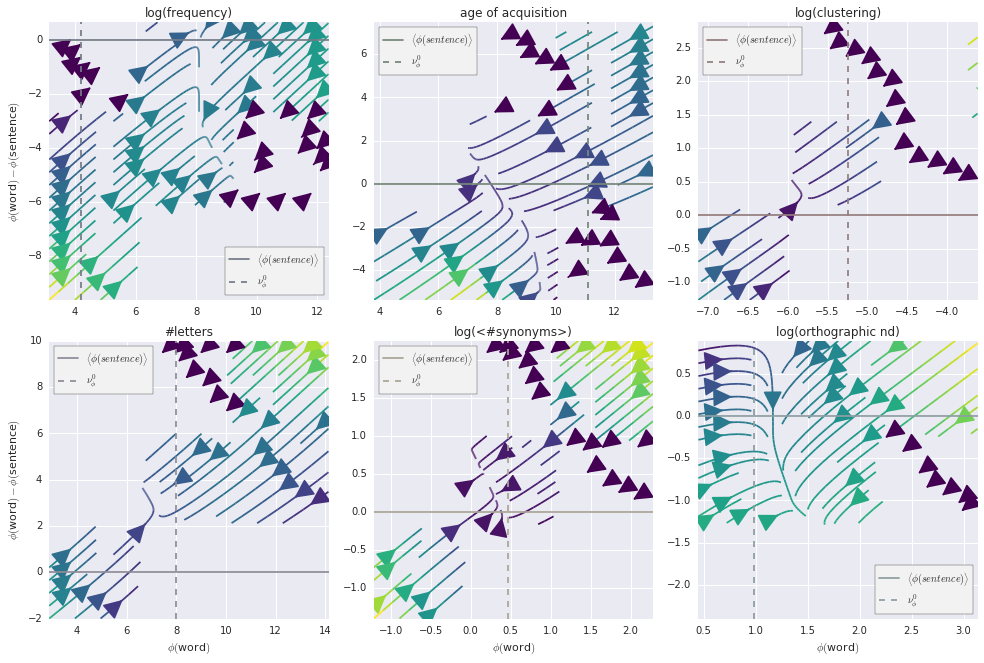

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51887095  0.17667846  0.08802866  0.07560441  0.03353084  0.03064661
  0.02046165  0.01843159  0.01653748  0.00906346  0.00708615]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.460364,0.294531,-0.080336,0.242995,0.250933,-0.423141,0.231074,0.293937,-0.385455,0.288662,-0.148595,-0.004976
Component-1,-0.266251,0.391018,-0.128295,0.292191,0.301223,0.422910,-0.183974,0.307144,0.427293,-0.258071,0.164004,-0.023056
Component-2,0.733642,0.205838,-0.124213,0.052973,0.608861,-0.127989,-0.019514,0.002379,-0.064045,0.081507,-0.017942,-0.051183


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 14485) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 14485) |                    | Elapsed Time: 0:00:42 ETA: 19:08:47

  0% (   29 of 14485) |                     | Elapsed Time: 0:00:43 ETA: 5:57:44

  0% (   52 of 14485) |                     | Elapsed Time: 0:00:43 ETA: 3:20:08

  0% (   79 of 14485) |                     | Elapsed Time: 0:00:43 ETA: 2:12:09

  0% (  104 of 14485) |                     | Elapsed Time: 0:00:43 ETA: 0:02:10

  0% (  135 of 14485) |                     | Elapsed Time: 0:00:43 ETA: 0:01:54

  1% (  160 of 14485) |                     | Elapsed Time: 0:00:44 ETA: 0:01:53

  1% (  195 of 14485) |                     | Elapsed Time: 0:00:44 ETA: 0:01:49

  1% (  221 of 14485) |                     | Elapsed Time: 0:00:44 ETA: 0:01:46

  1% (  243 of 14485) |                     | Elapsed Time: 0:00:44 ETA: 0:01:53

  1% (  272 of 14485) |                     | Elapsed Time: 0:00:44 ETA: 0:01:52

  2% (  299 of 14485) |                     | Elapsed Time: 0:00:45 ETA: 0:01:54

  2% (  323 of 14485) |                     | Elapsed Time: 0:00:45 ETA: 0:01:56

  2% (  348 of 14485) |                     | Elapsed Time: 0:00:45 ETA: 0:01:55

  2% (  376 of 14485) |                     | Elapsed Time: 0:00:45 ETA: 0:01:55

  2% (  401 of 14485) |                     | Elapsed Time: 0:00:46 ETA: 0:01:58

  2% (  426 of 14485) |                     | Elapsed Time: 0:00:46 ETA: 0:01:59

  3% (  450 of 14485) |                     | Elapsed Time: 0:00:46 ETA: 0:01:58

  3% (  474 of 14485) |                     | Elapsed Time: 0:00:46 ETA: 0:01:58

  3% (  499 of 14485) |                     | Elapsed Time: 0:00:46 ETA: 0:01:59

  3% (  523 of 14485) |                     | Elapsed Time: 0:00:47 ETA: 0:01:59

  3% (  556 of 14485) |                     | Elapsed Time: 0:00:47 ETA: 0:01:58

  4% (  582 of 14485) |                     | Elapsed Time: 0:00:47 ETA: 0:01:55

  4% (  608 of 14485) |                     | Elapsed Time: 0:00:47 ETA: 0:01:54

  4% (  638 of 14485) |                     | Elapsed Time: 0:00:48 ETA: 0:01:49

  4% (  668 of 14485) |                     | Elapsed Time: 0:00:48 ETA: 0:01:44

  4% (  690 of 14485) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:45

  4% (  710 of 14485) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:52

  5% (  735 of 14485) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:04

  5% (  754 of 14485) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:17

  5% (  773 of 14485) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:31

  5% (  791 of 14485) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:31

  5% (  811 of 14485) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:31

  5% (  831 of 14485) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:31

  5% (  855 of 14485) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:22

  6% (  883 of 14485) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:09

  6% (  915 of 14485) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:03

  6% (  936 of 14485) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:00

  6% (  957 of 14485) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:58

  6% (  979 of 14485) |#                    | Elapsed Time: 0:00:51 ETA: 0:02:04

  6% (  994 of 14485) |#                    | Elapsed Time: 0:00:51 ETA: 0:02:25

  7% ( 1022 of 14485) |#                    | Elapsed Time: 0:00:51 ETA: 0:02:12

  7% ( 1047 of 14485) |#                    | Elapsed Time: 0:00:51 ETA: 0:02:07

  7% ( 1087 of 14485) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:56

  7% ( 1116 of 14485) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:44

  7% ( 1147 of 14485) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:35

  8% ( 1173 of 14485) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:36

  8% ( 1200 of 14485) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:35

  8% ( 1232 of 14485) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:33

  8% ( 1268 of 14485) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:32

  8% ( 1284 of 14485) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:42

  9% ( 1305 of 14485) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:46

  9% ( 1325 of 14485) |#                    | Elapsed Time: 0:00:54 ETA: 0:01:57

  9% ( 1345 of 14485) |#                    | Elapsed Time: 0:00:54 ETA: 0:02:15

  9% ( 1368 of 14485) |#                    | Elapsed Time: 0:00:54 ETA: 0:02:17

  9% ( 1396 of 14485) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:04

  9% ( 1412 of 14485) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:08

  9% ( 1434 of 14485) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:05

 10% ( 1457 of 14485) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:06

 10% ( 1481 of 14485) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:09

 10% ( 1513 of 14485) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:57

 10% ( 1546 of 14485) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:42

 10% ( 1575 of 14485) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:36

 11% ( 1602 of 14485) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:28

 11% ( 1646 of 14485) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:29

 11% ( 1677 of 14485) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:29

 11% ( 1705 of 14485) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:33

 11% ( 1729 of 14485) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:33

 12% ( 1751 of 14485) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:39

 12% ( 1769 of 14485) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:55

 12% ( 1786 of 14485) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:11

 12% ( 1811 of 14485) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:25

 12% ( 1827 of 14485) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:38

 12% ( 1844 of 14485) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:38

 12% ( 1862 of 14485) |##                   | Elapsed Time: 0:00:59 ETA: 0:02:37

 13% ( 1885 of 14485) |##                   | Elapsed Time: 0:00:59 ETA: 0:02:25

 13% ( 1911 of 14485) |##                   | Elapsed Time: 0:00:59 ETA: 0:02:09

 13% ( 1941 of 14485) |##                   | Elapsed Time: 0:00:59 ETA: 0:01:52

 13% ( 1967 of 14485) |##                   | Elapsed Time: 0:00:59 ETA: 0:01:42

 13% ( 1992 of 14485) |##                   | Elapsed Time: 0:01:00 ETA: 0:01:42

 13% ( 2021 of 14485) |##                   | Elapsed Time: 0:01:00 ETA: 0:01:40

 14% ( 2049 of 14485) |##                   | Elapsed Time: 0:01:00 ETA: 0:01:40

 14% ( 2077 of 14485) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:39

 14% ( 2105 of 14485) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:34

 14% ( 2133 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:32

 15% ( 2173 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:30

 15% ( 2193 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:35

 15% ( 2212 of 14485) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:42

 15% ( 2232 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:46

 15% ( 2258 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:51

 15% ( 2282 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:55

 15% ( 2305 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:51

 16% ( 2331 of 14485) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:44

 16% ( 2363 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:45

 16% ( 2378 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:57

 16% ( 2395 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:01

 16% ( 2417 of 14485) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:06

 16% ( 2444 of 14485) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:06

 17% ( 2472 of 14485) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:54

 17% ( 2499 of 14485) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:37

 17% ( 2535 of 14485) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:31

 17% ( 2560 of 14485) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:30

 17% ( 2586 of 14485) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:31

 18% ( 2610 of 14485) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:34

 18% ( 2644 of 14485) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:28

 18% ( 2667 of 14485) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:33

 18% ( 2700 of 14485) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:27

 18% ( 2728 of 14485) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:25

 18% ( 2752 of 14485) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:32

 19% ( 2768 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:40

 19% ( 2784 of 14485) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:52

 19% ( 2800 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:10

 19% ( 2816 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:28

 19% ( 2832 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:33

 19% ( 2859 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:12

 20% ( 2897 of 14485) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:53

 20% ( 2927 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:37

 20% ( 2957 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:26

 20% ( 2989 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:18

 20% ( 3022 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:17

 21% ( 3051 of 14485) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:16

 21% ( 3079 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:18

 21% ( 3101 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:23

 21% ( 3125 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:30

 21% ( 3151 of 14485) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:34

 21% ( 3177 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:35

 22% ( 3191 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:46

 22% ( 3221 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:39

 22% ( 3245 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:40

 22% ( 3273 of 14485) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:42

 22% ( 3304 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:30

 23% ( 3332 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:26

 23% ( 3359 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:26

 23% ( 3391 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:19

 23% ( 3421 of 14485) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:16

 23% ( 3452 of 14485) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:25

 23% ( 3476 of 14485) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:24

 24% ( 3500 of 14485) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:29

 24% ( 3526 of 14485) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:34

 24% ( 3552 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:34

 24% ( 3569 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:36

 24% ( 3593 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:37

 25% ( 3638 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:28

 25% ( 3665 of 14485) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:27

 25% ( 3693 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:23

 25% ( 3721 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:16

 25% ( 3747 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:19

 26% ( 3771 of 14485) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:24

 26% ( 3803 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:27

 26% ( 3833 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:26

 26% ( 3863 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:22

 26% ( 3889 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:23

 27% ( 3917 of 14485) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:19

 27% ( 3947 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:16

 27% ( 3967 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:23

 27% ( 3996 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:26

 27% ( 4008 of 14485) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:26

 27% ( 4041 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:05:35

 28% ( 4066 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:05:22

 28% ( 4086 of 14485) |#####                | Elapsed Time: 0:01:19 ETA: 0:05:32

 28% ( 4109 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:05:46

 28% ( 4135 of 14485) |#####                | Elapsed Time: 0:01:20 ETA: 0:01:30

 28% ( 4165 of 14485) |######               | Elapsed Time: 0:01:20 ETA: 0:01:32

 28% ( 4194 of 14485) |######               | Elapsed Time: 0:01:20 ETA: 0:01:26

 29% ( 4220 of 14485) |######               | Elapsed Time: 0:01:20 ETA: 0:01:21

 29% ( 4248 of 14485) |######               | Elapsed Time: 0:01:21 ETA: 0:01:20

 29% ( 4272 of 14485) |######               | Elapsed Time: 0:01:21 ETA: 0:01:20

 29% ( 4296 of 14485) |######               | Elapsed Time: 0:01:21 ETA: 0:01:21

 29% ( 4322 of 14485) |######               | Elapsed Time: 0:01:21 ETA: 0:01:23

 30% ( 4346 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:01:25

 30% ( 4367 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:01:29

 30% ( 4389 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:01:30

 30% ( 4417 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:01:27

 30% ( 4446 of 14485) |######               | Elapsed Time: 0:01:22 ETA: 0:01:24

 30% ( 4461 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:01:33

 30% ( 4473 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:01:40

 30% ( 4485 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:01:55

 31% ( 4497 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:02:28

 31% ( 4510 of 14485) |######               | Elapsed Time: 0:01:23 ETA: 0:02:54

 31% ( 4527 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:45

 31% ( 4550 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:02:19

 31% ( 4575 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:01:57

 31% ( 4599 of 14485) |######               | Elapsed Time: 0:01:24 ETA: 0:01:42

 31% ( 4622 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:01:33

 32% ( 4647 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:01:24

 32% ( 4670 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:01:26

 32% ( 4691 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:01:27

 32% ( 4724 of 14485) |######               | Elapsed Time: 0:01:25 ETA: 0:01:25

 32% ( 4746 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:01:28

 32% ( 4764 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:01:32

 33% ( 4788 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:01:31

 33% ( 4814 of 14485) |######               | Elapsed Time: 0:01:26 ETA: 0:01:27

 33% ( 4838 of 14485) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:26

 33% ( 4857 of 14485) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:29

 33% ( 4871 of 14485) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:39

 33% ( 4905 of 14485) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:33

 34% ( 4928 of 14485) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:38

 34% ( 4956 of 14485) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:33

 34% ( 4982 of 14485) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:22

 34% ( 5008 of 14485) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:13

 34% ( 5032 of 14485) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:15

 35% ( 5070 of 14485) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:15

 35% ( 5099 of 14485) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:12

 35% ( 5125 of 14485) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:12

 35% ( 5149 of 14485) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:13

 35% ( 5168 of 14485) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:17

 35% ( 5195 of 14485) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:18

 35% ( 5212 of 14485) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:28

 36% ( 5251 of 14485) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:25

 36% ( 5269 of 14485) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:24

 36% ( 5291 of 14485) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:28

 36% ( 5315 of 14485) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:27

 36% ( 5339 of 14485) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:20

 36% ( 5357 of 14485) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:31

 37% ( 5383 of 14485) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:23

 37% ( 5407 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:01:24

 37% ( 5432 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:01:26

 37% ( 5454 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:01:24

 37% ( 5478 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:01:20

 37% ( 5498 of 14485) |#######              | Elapsed Time: 0:01:32 ETA: 0:01:26

 38% ( 5520 of 14485) |########             | Elapsed Time: 0:01:33 ETA: 0:01:25

 38% ( 5547 of 14485) |########             | Elapsed Time: 0:01:33 ETA: 0:01:21

 38% ( 5574 of 14485) |########             | Elapsed Time: 0:01:33 ETA: 0:01:16

 38% ( 5597 of 14485) |########             | Elapsed Time: 0:01:33 ETA: 0:01:16

 38% ( 5613 of 14485) |########             | Elapsed Time: 0:01:33 ETA: 0:01:20

 38% ( 5630 of 14485) |########             | Elapsed Time: 0:01:34 ETA: 0:01:25

 38% ( 5641 of 14485) |########             | Elapsed Time: 0:01:34 ETA: 0:01:40

 39% ( 5652 of 14485) |########             | Elapsed Time: 0:01:34 ETA: 0:02:02

 39% ( 5670 of 14485) |########             | Elapsed Time: 0:01:34 ETA: 0:02:09

 39% ( 5694 of 14485) |########             | Elapsed Time: 0:01:35 ETA: 0:02:01

 39% ( 5718 of 14485) |########             | Elapsed Time: 0:01:35 ETA: 0:01:40

 39% ( 5746 of 14485) |########             | Elapsed Time: 0:01:35 ETA: 0:01:22

 39% ( 5776 of 14485) |########             | Elapsed Time: 0:01:35 ETA: 0:01:08

 40% ( 5806 of 14485) |########             | Elapsed Time: 0:01:35 ETA: 0:01:09

 40% ( 5831 of 14485) |########             | Elapsed Time: 0:01:36 ETA: 0:01:08

 40% ( 5859 of 14485) |########             | Elapsed Time: 0:01:36 ETA: 0:01:07

 40% ( 5885 of 14485) |########             | Elapsed Time: 0:01:36 ETA: 0:01:09

 40% ( 5910 of 14485) |########             | Elapsed Time: 0:01:36 ETA: 0:01:10

 40% ( 5933 of 14485) |########             | Elapsed Time: 0:01:37 ETA: 0:01:10

 41% ( 5958 of 14485) |########             | Elapsed Time: 0:01:37 ETA: 0:01:10

 41% ( 5988 of 14485) |########             | Elapsed Time: 0:01:37 ETA: 0:01:13

 41% ( 6015 of 14485) |########             | Elapsed Time: 0:01:37 ETA: 0:01:11

 41% ( 6032 of 14485) |########             | Elapsed Time: 0:01:37 ETA: 0:01:14

 41% ( 6060 of 14485) |########             | Elapsed Time: 0:01:38 ETA: 0:01:11

 42% ( 6086 of 14485) |########             | Elapsed Time: 0:01:38 ETA: 0:01:12

 42% ( 6108 of 14485) |########             | Elapsed Time: 0:01:38 ETA: 0:01:14

 42% ( 6136 of 14485) |########             | Elapsed Time: 0:01:38 ETA: 0:01:09

 42% ( 6157 of 14485) |########             | Elapsed Time: 0:01:38 ETA: 0:01:10

 42% ( 6171 of 14485) |########             | Elapsed Time: 0:01:39 ETA: 0:01:20

 42% ( 6199 of 14485) |########             | Elapsed Time: 0:01:39 ETA: 0:01:15

 42% ( 6225 of 14485) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:17

 43% ( 6249 of 14485) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:15

 43% ( 6279 of 14485) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:07

 43% ( 6299 of 14485) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:07

 43% ( 6318 of 14485) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:15

 43% ( 6348 of 14485) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:15

 43% ( 6368 of 14485) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:20

 44% ( 6388 of 14485) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:24

 44% ( 6413 of 14485) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:19

 44% ( 6432 of 14485) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:20

 44% ( 6449 of 14485) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:24

 44% ( 6475 of 14485) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:18

 44% ( 6496 of 14485) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:18

 45% ( 6536 of 14485) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:11

 45% ( 6566 of 14485) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:02

 45% ( 6582 of 14485) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:03

 45% ( 6609 of 14485) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:03

 45% ( 6630 of 14485) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:05

 45% ( 6652 of 14485) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:15

 46% ( 6683 of 14485) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:06

 46% ( 6708 of 14485) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:07

 46% ( 6728 of 14485) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:11

 46% ( 6754 of 14485) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:05

 46% ( 6782 of 14485) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:06

 46% ( 6801 of 14485) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:13

 47% ( 6822 of 14485) |#########            | Elapsed Time: 0:01:45 ETA: 0:01:09

 47% ( 6847 of 14485) |#########            | Elapsed Time: 0:01:45 ETA: 0:01:07

 47% ( 6881 of 14485) |#########            | Elapsed Time: 0:01:45 ETA: 0:01:07

 47% ( 6913 of 14485) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:02

 47% ( 6932 of 14485) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:00

 47% ( 6942 of 14485) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:09

 48% ( 6956 of 14485) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:19

 48% ( 6973 of 14485) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:33

 48% ( 6987 of 14485) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:57

 48% ( 7012 of 14485) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:33

 48% ( 7040 of 14485) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:14

 48% ( 7074 of 14485) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:06

 49% ( 7103 of 14485) |##########           | Elapsed Time: 0:01:47 ETA: 0:00:58

 49% ( 7131 of 14485) |##########           | Elapsed Time: 0:01:47 ETA: 0:00:55

 49% ( 7161 of 14485) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:53

 49% ( 7178 of 14485) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:59

 49% ( 7205 of 14485) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:59

 49% ( 7230 of 14485) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:01

 50% ( 7255 of 14485) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:03

 50% ( 7273 of 14485) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:08

 50% ( 7299 of 14485) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:04

 50% ( 7326 of 14485) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:04

 50% ( 7352 of 14485) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:01

 50% ( 7379 of 14485) |##########           | Elapsed Time: 0:01:49 ETA: 0:00:57

 51% ( 7407 of 14485) |##########           | Elapsed Time: 0:01:50 ETA: 0:00:55

 51% ( 7435 of 14485) |##########           | Elapsed Time: 0:01:50 ETA: 0:00:58

 51% ( 7455 of 14485) |##########           | Elapsed Time: 0:01:50 ETA: 0:01:01

 51% ( 7473 of 14485) |##########           | Elapsed Time: 0:01:50 ETA: 0:01:06

 51% ( 7505 of 14485) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:04

 51% ( 7530 of 14485) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:03

 52% ( 7558 of 14485) |##########           | Elapsed Time: 0:01:51 ETA: 0:00:58

 52% ( 7582 of 14485) |##########           | Elapsed Time: 0:01:51 ETA: 0:00:57

 52% ( 7617 of 14485) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:52

 52% ( 7645 of 14485) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:53

 52% ( 7674 of 14485) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:51

 53% ( 7698 of 14485) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:53

 53% ( 7716 of 14485) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:57

 53% ( 7726 of 14485) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:07

 53% ( 7743 of 14485) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:17

 53% ( 7762 of 14485) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:26

 53% ( 7792 of 14485) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:25

 53% ( 7811 of 14485) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:17

 54% ( 7842 of 14485) |###########          | Elapsed Time: 0:01:54 ETA: 0:01:03

 54% ( 7872 of 14485) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:56

 54% ( 7899 of 14485) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:54

 54% ( 7923 of 14485) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:50

 54% ( 7950 of 14485) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:49

 55% ( 7967 of 14485) |###########          | Elapsed Time: 0:01:55 ETA: 0:00:58

 55% ( 7991 of 14485) |###########          | Elapsed Time: 0:01:55 ETA: 0:00:59

 55% ( 8017 of 14485) |###########          | Elapsed Time: 0:01:55 ETA: 0:00:59

 55% ( 8043 of 14485) |###########          | Elapsed Time: 0:01:55 ETA: 0:00:58

 55% ( 8072 of 14485) |###########          | Elapsed Time: 0:01:56 ETA: 0:00:52

 55% ( 8105 of 14485) |###########          | Elapsed Time: 0:01:56 ETA: 0:00:47

 56% ( 8130 of 14485) |###########          | Elapsed Time: 0:01:56 ETA: 0:00:46

 56% ( 8153 of 14485) |###########          | Elapsed Time: 0:01:56 ETA: 0:00:52

 56% ( 8171 of 14485) |###########          | Elapsed Time: 0:01:56 ETA: 0:00:56

 56% ( 8199 of 14485) |###########          | Elapsed Time: 0:01:57 ETA: 0:00:58

 56% ( 8218 of 14485) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:03

 56% ( 8240 of 14485) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:05

 57% ( 8262 of 14485) |###########          | Elapsed Time: 0:01:57 ETA: 0:00:55

 57% ( 8280 of 14485) |############         | Elapsed Time: 0:01:58 ETA: 0:01:02

 57% ( 8296 of 14485) |############         | Elapsed Time: 0:01:58 ETA: 0:01:05

 57% ( 8321 of 14485) |############         | Elapsed Time: 0:01:58 ETA: 0:01:02

 57% ( 8343 of 14485) |############         | Elapsed Time: 0:01:58 ETA: 0:01:02

 57% ( 8368 of 14485) |############         | Elapsed Time: 0:01:58 ETA: 0:01:00

 57% ( 8394 of 14485) |############         | Elapsed Time: 0:01:59 ETA: 0:00:54

 58% ( 8416 of 14485) |############         | Elapsed Time: 0:01:59 ETA: 0:00:55

 58% ( 8432 of 14485) |############         | Elapsed Time: 0:01:59 ETA: 0:00:55

 58% ( 8455 of 14485) |############         | Elapsed Time: 0:01:59 ETA: 0:00:58

 58% ( 8468 of 14485) |############         | Elapsed Time: 0:01:59 ETA: 0:01:03

 58% ( 8489 of 14485) |############         | Elapsed Time: 0:02:00 ETA: 0:01:06

 58% ( 8525 of 14485) |############         | Elapsed Time: 0:02:00 ETA: 0:00:56

 59% ( 8555 of 14485) |############         | Elapsed Time: 0:02:00 ETA: 0:00:50

 59% ( 8579 of 14485) |############         | Elapsed Time: 0:02:00 ETA: 0:00:48

 59% ( 8609 of 14485) |############         | Elapsed Time: 0:02:00 ETA: 0:00:42

 59% ( 8637 of 14485) |############         | Elapsed Time: 0:02:01 ETA: 0:00:42

 59% ( 8664 of 14485) |############         | Elapsed Time: 0:02:01 ETA: 0:00:43

 60% ( 8691 of 14485) |############         | Elapsed Time: 0:02:01 ETA: 0:00:44

 60% ( 8719 of 14485) |############         | Elapsed Time: 0:02:01 ETA: 0:00:44

 60% ( 8739 of 14485) |############         | Elapsed Time: 0:02:02 ETA: 0:00:47

 60% ( 8765 of 14485) |############         | Elapsed Time: 0:02:02 ETA: 0:00:46

 60% ( 8797 of 14485) |############         | Elapsed Time: 0:02:02 ETA: 0:00:45

 60% ( 8818 of 14485) |############         | Elapsed Time: 0:02:02 ETA: 0:00:46

 61% ( 8843 of 14485) |############         | Elapsed Time: 0:02:02 ETA: 0:00:46

 61% ( 8873 of 14485) |############         | Elapsed Time: 0:02:03 ETA: 0:00:43

 61% ( 8902 of 14485) |############         | Elapsed Time: 0:02:03 ETA: 0:00:44

 61% ( 8931 of 14485) |############         | Elapsed Time: 0:02:03 ETA: 0:00:43

 61% ( 8960 of 14485) |############         | Elapsed Time: 0:02:03 ETA: 0:00:41

 62% ( 8985 of 14485) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:42

 62% ( 9017 of 14485) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:38

 62% ( 9054 of 14485) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:39

 62% ( 9078 of 14485) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:40

 62% ( 9100 of 14485) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:42

 63% ( 9126 of 14485) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:43

 63% ( 9149 of 14485) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:46

 63% ( 9173 of 14485) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:46

 63% ( 9197 of 14485) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:47

 63% ( 9220 of 14485) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:47

 63% ( 9246 of 14485) |#############        | Elapsed Time: 0:02:06 ETA: 0:00:45

 64% ( 9273 of 14485) |#############        | Elapsed Time: 0:02:06 ETA: 0:00:45

 64% ( 9304 of 14485) |#############        | Elapsed Time: 0:02:06 ETA: 0:00:40

 64% ( 9330 of 14485) |#############        | Elapsed Time: 0:02:06 ETA: 0:00:40

 64% ( 9354 of 14485) |#############        | Elapsed Time: 0:02:06 ETA: 0:00:40

 64% ( 9380 of 14485) |#############        | Elapsed Time: 0:02:07 ETA: 0:00:39

 65% ( 9416 of 14485) |#############        | Elapsed Time: 0:02:07 ETA: 0:00:38

 65% ( 9441 of 14485) |#############        | Elapsed Time: 0:02:07 ETA: 0:00:40

 65% ( 9465 of 14485) |#############        | Elapsed Time: 0:02:07 ETA: 0:00:40

 65% ( 9492 of 14485) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:39

 65% ( 9518 of 14485) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:40

 65% ( 9539 of 14485) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:42

 66% ( 9567 of 14485) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:40

 66% ( 9597 of 14485) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:40

 66% ( 9625 of 14485) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:40

 66% ( 9655 of 14485) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:37

 66% ( 9672 of 14485) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:38

 66% ( 9702 of 14485) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:38

 67% ( 9733 of 14485) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:37

 67% ( 9759 of 14485) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:37

 67% ( 9788 of 14485) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:38

 67% ( 9814 of 14485) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:35

 67% ( 9840 of 14485) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:36

 68% ( 9864 of 14485) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:38

 68% ( 9889 of 14485) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:39

 68% ( 9917 of 14485) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:36

 68% ( 9933 of 14485) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:41

 68% ( 9959 of 14485) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:41

 68% ( 9982 of 14485) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:40

 69% (10010 of 14485) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:41

 69% (10037 of 14485) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:38

 69% (10061 of 14485) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:36

 69% (10077 of 14485) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:38

 69% (10098 of 14485) |##############       | Elapsed Time: 0:02:13 ETA: 0:00:40

 69% (10122 of 14485) |##############       | Elapsed Time: 0:02:13 ETA: 0:00:41

 70% (10154 of 14485) |##############       | Elapsed Time: 0:02:13 ETA: 0:00:40

 70% (10174 of 14485) |##############       | Elapsed Time: 0:02:13 ETA: 0:00:39

 70% (10199 of 14485) |##############       | Elapsed Time: 0:02:13 ETA: 0:00:37

 70% (10224 of 14485) |##############       | Elapsed Time: 0:02:14 ETA: 0:00:36

 70% (10253 of 14485) |##############       | Elapsed Time: 0:02:14 ETA: 0:00:34

 70% (10284 of 14485) |##############       | Elapsed Time: 0:02:14 ETA: 0:00:32

 71% (10309 of 14485) |##############       | Elapsed Time: 0:02:14 ETA: 0:00:30

 71% (10333 of 14485) |##############       | Elapsed Time: 0:02:15 ETA: 0:00:31

 71% (10350 of 14485) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:34

 71% (10374 of 14485) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:36

 71% (10396 of 14485) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:39

 71% (10419 of 14485) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:39

 72% (10444 of 14485) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:37

 72% (10468 of 14485) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:36

 72% (10502 of 14485) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:33

 72% (10524 of 14485) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:34

 72% (10547 of 14485) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:34

 72% (10566 of 14485) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:35

 73% (10593 of 14485) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:35

 73% (10621 of 14485) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:33

 73% (10647 of 14485) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:32

 73% (10683 of 14485) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:30

 73% (10705 of 14485) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:31

 74% (10730 of 14485) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:31

 74% (10749 of 14485) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:34

 74% (10779 of 14485) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:31

 74% (10805 of 14485) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:31

 74% (10827 of 14485) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:31

 75% (10864 of 14485) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:28

 75% (10896 of 14485) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:25

 75% (10919 of 14485) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:27

 75% (10948 of 14485) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:25

 75% (10977 of 14485) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:24

 75% (11005 of 14485) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:26

 76% (11031 of 14485) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:27

 76% (11055 of 14485) |################     | Elapsed Time: 0:02:21 ETA: 0:00:26

 76% (11076 of 14485) |################     | Elapsed Time: 0:02:21 ETA: 0:00:28

 76% (11099 of 14485) |################     | Elapsed Time: 0:02:21 ETA: 0:00:30

 76% (11130 of 14485) |################     | Elapsed Time: 0:02:21 ETA: 0:00:29

 76% (11149 of 14485) |################     | Elapsed Time: 0:02:21 ETA: 0:00:30

 77% (11159 of 14485) |################     | Elapsed Time: 0:02:22 ETA: 0:00:33

 77% (11174 of 14485) |################     | Elapsed Time: 0:02:22 ETA: 0:00:35

 77% (11202 of 14485) |################     | Elapsed Time: 0:02:22 ETA: 0:00:35

 77% (11226 of 14485) |################     | Elapsed Time: 0:02:22 ETA: 0:00:38

 77% (11252 of 14485) |################     | Elapsed Time: 0:02:23 ETA: 0:00:32

 77% (11273 of 14485) |################     | Elapsed Time: 0:02:23 ETA: 0:00:29

 78% (11302 of 14485) |################     | Elapsed Time: 0:02:23 ETA: 0:00:27

 78% (11316 of 14485) |################     | Elapsed Time: 0:02:23 ETA: 0:00:30

 78% (11328 of 14485) |################     | Elapsed Time: 0:02:23 ETA: 0:00:33

 78% (11363 of 14485) |################     | Elapsed Time: 0:02:24 ETA: 0:00:31

 78% (11385 of 14485) |################     | Elapsed Time: 0:02:24 ETA: 0:00:34

 78% (11417 of 14485) |################     | Elapsed Time: 0:02:24 ETA: 0:00:29

 78% (11432 of 14485) |################     | Elapsed Time: 0:02:24 ETA: 0:00:29

 79% (11462 of 14485) |################     | Elapsed Time: 0:02:25 ETA: 0:00:26

 79% (11500 of 14485) |################     | Elapsed Time: 0:02:25 ETA: 0:00:25

 79% (11522 of 14485) |################     | Elapsed Time: 0:02:25 ETA: 0:00:26

 79% (11553 of 14485) |################     | Elapsed Time: 0:02:25 ETA: 0:00:22

 80% (11588 of 14485) |################     | Elapsed Time: 0:02:26 ETA: 0:00:23

 80% (11619 of 14485) |################     | Elapsed Time: 0:02:26 ETA: 0:00:22

 80% (11636 of 14485) |################     | Elapsed Time: 0:02:26 ETA: 0:00:24

 80% (11666 of 14485) |################     | Elapsed Time: 0:02:26 ETA: 0:00:22

 80% (11692 of 14485) |################     | Elapsed Time: 0:02:26 ETA: 0:00:23

 80% (11713 of 14485) |################     | Elapsed Time: 0:02:27 ETA: 0:00:24

 80% (11731 of 14485) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:26

 81% (11770 of 14485) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:23

 81% (11796 of 14485) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:24

 81% (11820 of 14485) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:23

 81% (11847 of 14485) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:22

 81% (11877 of 14485) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:20

 82% (11902 of 14485) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:20

 82% (11925 of 14485) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:20

 82% (11935 of 14485) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:23

 82% (11965 of 14485) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:24

 82% (11996 of 14485) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:24

 82% (12022 of 14485) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:23

 83% (12046 of 14485) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:21

 83% (12076 of 14485) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:18

 83% (12092 of 14485) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:20

 83% (12132 of 14485) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:20

 83% (12155 of 14485) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:20

 84% (12182 of 14485) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:20

 84% (12205 of 14485) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:19

 84% (12233 of 14485) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:17

 84% (12264 of 14485) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:17

 84% (12289 of 14485) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:17

 85% (12328 of 14485) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:16

 85% (12352 of 14485) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:16

 85% (12379 of 14485) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:16

 85% (12407 of 14485) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:16

 85% (12430 of 14485) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:16

 85% (12456 of 14485) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:16

 86% (12494 of 14485) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:16

 86% (12521 of 14485) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:15

 86% (12550 of 14485) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:15

 86% (12574 of 14485) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:15

 87% (12602 of 14485) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:14

 87% (12628 of 14485) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:14

 87% (12655 of 14485) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:14

 87% (12689 of 14485) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:13

 87% (12709 of 14485) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:14

 87% (12734 of 14485) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:14

 88% (12763 of 14485) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:14

 88% (12792 of 14485) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:13

 88% (12822 of 14485) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:12

 88% (12847 of 14485) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:12

 88% (12867 of 14485) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:13

 89% (12892 of 14485) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:13

 89% (12921 of 14485) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:13

 89% (12934 of 14485) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:15

 89% (12953 of 14485) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:15

 89% (12977 of 14485) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:14

 89% (13002 of 14485) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:14

 89% (13024 of 14485) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:14

 90% (13046 of 14485) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:13

 90% (13074 of 14485) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:12

 90% (13101 of 14485) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:11

 90% (13128 of 14485) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:11

 90% (13154 of 14485) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:10

 90% (13174 of 14485) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:10

 91% (13190 of 14485) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:12

 91% (13218 of 14485) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:13

 91% (13234 of 14485) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:14

 91% (13255 of 14485) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:14

 91% (13279 of 14485) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:13

 91% (13302 of 14485) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:12

 92% (13331 of 14485) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:10

 92% (13362 of 14485) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:09

 92% (13383 of 14485) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:08

 92% (13414 of 14485) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:08

 92% (13445 of 14485) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:07

 92% (13469 of 14485) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:08

 93% (13499 of 14485) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:07

 93% (13530 of 14485) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:06

 93% (13559 of 14485) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:06

 93% (13590 of 14485) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:06

 93% (13608 of 14485) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:06

 94% (13635 of 14485) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:06

 94% (13666 of 14485) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:06

 94% (13694 of 14485) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:06

 94% (13721 of 14485) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:05

 94% (13742 of 14485) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:05

 95% (13761 of 14485) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:06

 95% (13791 of 14485) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:05

 95% (13813 of 14485) |#################### | Elapsed Time: 0:02:44 ETA: 0:00:05

 95% (13830 of 14485) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:06

 95% (13846 of 14485) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:06

 95% (13870 of 14485) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:06

 95% (13891 of 14485) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:06

 96% (13920 of 14485) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:05

 96% (13959 of 14485) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:04

 96% (13985 of 14485) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:03

 96% (14010 of 14485) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:03

 96% (14033 of 14485) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:03

 97% (14065 of 14485) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:03

 97% (14089 of 14485) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:03

 97% (14123 of 14485) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:02

 97% (14152 of 14485) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:02

 97% (14175 of 14485) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:02

 98% (14197 of 14485) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:02

 98% (14218 of 14485) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:02

 98% (14248 of 14485) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:01

 98% (14278 of 14485) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:01

 98% (14304 of 14485) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:01

 98% (14330 of 14485) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:01

 99% (14357 of 14485) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:00

 99% (14385 of 14485) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:00

 99% (14410 of 14485) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:00

 99% (14437 of 14485) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:00

 99% (14466 of 14485) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:00

100% (14485 of 14485) |####################| Elapsed Time: 0:02:50 Time: 0:02:50


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | *   | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *   | ns. |


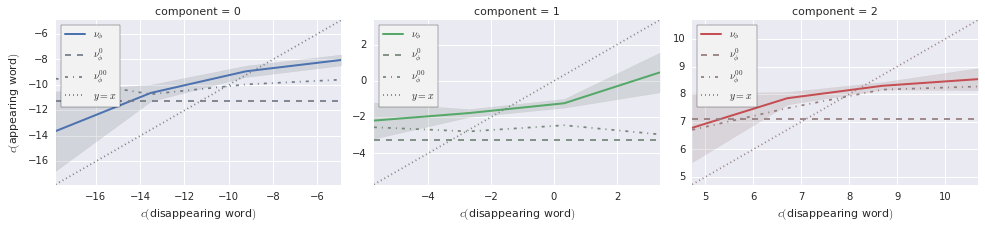

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67536175  0.1811119 ]



,aoa,frequency,letters_count
Component-0,-0.735084,0.373119,-0.566069
Component-1,0.374534,-0.472487,-0.797797


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 14485) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   14 of 14485) |                     | Elapsed Time: 0:00:03 ETA: 0:53:37

  0% (   41 of 14485) |                     | Elapsed Time: 0:00:03 ETA: 0:19:29

  0% (   70 of 14485) |                     | Elapsed Time: 0:00:03 ETA: 0:12:04

  0% (  103 of 14485) |                     | Elapsed Time: 0:00:03 ETA: 0:08:40

  0% (  138 of 14485) |                     | Elapsed Time: 0:00:03 ETA: 0:01:37

  1% (  182 of 14485) |                     | Elapsed Time: 0:00:04 ETA: 0:01:31

  1% (  213 of 14485) |                     | Elapsed Time: 0:00:04 ETA: 0:01:28

  1% (  244 of 14485) |                     | Elapsed Time: 0:00:04 ETA: 0:01:28

  1% (  279 of 14485) |                     | Elapsed Time: 0:00:04 ETA: 0:01:28

  2% (  311 of 14485) |                     | Elapsed Time: 0:00:05 ETA: 0:01:29

  2% (  342 of 14485) |                     | Elapsed Time: 0:00:05 ETA: 0:01:31

  2% (  378 of 14485) |                     | Elapsed Time: 0:00:05 ETA: 0:01:31

  2% (  409 of 14485) |                     | Elapsed Time: 0:00:05 ETA: 0:01:32

  3% (  439 of 14485) |                     | Elapsed Time: 0:00:05 ETA: 0:01:34

  3% (  483 of 14485) |                     | Elapsed Time: 0:00:06 ETA: 0:01:35

  3% (  513 of 14485) |                     | Elapsed Time: 0:00:06 ETA: 0:01:34

  3% (  544 of 14485) |                     | Elapsed Time: 0:00:06 ETA: 0:01:35

  3% (  575 of 14485) |                     | Elapsed Time: 0:00:06 ETA: 0:01:34

  4% (  607 of 14485) |                     | Elapsed Time: 0:00:07 ETA: 0:01:33

  4% (  639 of 14485) |                     | Elapsed Time: 0:00:07 ETA: 0:01:32

  4% (  673 of 14485) |                     | Elapsed Time: 0:00:07 ETA: 0:01:29

  4% (  701 of 14485) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:31

  5% (  738 of 14485) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:36

  5% (  764 of 14485) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:42

  5% (  790 of 14485) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:45

  5% (  816 of 14485) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:50

  5% (  843 of 14485) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:49

  6% (  877 of 14485) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:42

  6% (  920 of 14485) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:35

  6% (  948 of 14485) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:34

  6% (  976 of 14485) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:32

  6% ( 1002 of 14485) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:35

  7% ( 1036 of 14485) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:36

  7% ( 1087 of 14485) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:31

  7% ( 1121 of 14485) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:26

  7% ( 1157 of 14485) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:21

  8% ( 1191 of 14485) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:18

  8% ( 1229 of 14485) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:16

  8% ( 1268 of 14485) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:14

  8% ( 1295 of 14485) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:19

  9% ( 1323 of 14485) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:22

  9% ( 1351 of 14485) |#                    | Elapsed Time: 0:00:12 ETA: 0:01:26

  9% ( 1386 of 14485) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:28

  9% ( 1415 of 14485) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:29

 10% ( 1449 of 14485) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:29

 10% ( 1479 of 14485) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:28

 10% ( 1516 of 14485) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:24

 10% ( 1554 of 14485) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:22

 10% ( 1587 of 14485) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:18

 11% ( 1630 of 14485) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:14

 11% ( 1668 of 14485) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:13

 11% ( 1702 of 14485) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:14

 11% ( 1734 of 14485) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:15

 12% ( 1761 of 14485) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:19

 12% ( 1786 of 14485) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:26

 12% ( 1811 of 14485) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:30

 12% ( 1836 of 14485) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:39

 12% ( 1875 of 14485) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:43

 13% ( 1909 of 14485) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:36

 13% ( 1944 of 14485) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:29

 13% ( 1976 of 14485) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:22

 13% ( 2010 of 14485) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:17

 14% ( 2044 of 14485) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:16

 14% ( 2077 of 14485) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:17

 14% ( 2110 of 14485) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:17

 14% ( 2145 of 14485) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:14

 15% ( 2186 of 14485) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:16

 15% ( 2216 of 14485) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:18

 15% ( 2249 of 14485) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:18

 15% ( 2280 of 14485) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:19

 15% ( 2311 of 14485) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:21

 16% ( 2354 of 14485) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:19

 16% ( 2378 of 14485) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:22

 16% ( 2405 of 14485) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:25

 16% ( 2451 of 14485) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:25

 17% ( 2483 of 14485) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:25

 17% ( 2517 of 14485) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:19

 17% ( 2551 of 14485) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:15

 17% ( 2583 of 14485) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:14

 18% ( 2615 of 14485) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:14

 18% ( 2652 of 14485) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:12

 18% ( 2686 of 14485) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:12

 18% ( 2732 of 14485) |###                  | Elapsed Time: 0:00:21 ETA: 0:01:11

 19% ( 2760 of 14485) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:12

 19% ( 2785 of 14485) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:19

 19% ( 2810 of 14485) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:23

 19% ( 2834 of 14485) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:32

 19% ( 2870 of 14485) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:30

 20% ( 2915 of 14485) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:20

 20% ( 2950 of 14485) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:14

 20% ( 3004 of 14485) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:06

 20% ( 3041 of 14485) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:05

 21% ( 3079 of 14485) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:05

 21% ( 3109 of 14485) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:08

 21% ( 3143 of 14485) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:09

 21% ( 3177 of 14485) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:10

 22% ( 3203 of 14485) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:14

 22% ( 3236 of 14485) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:12

 22% ( 3277 of 14485) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:13

 22% ( 3313 of 14485) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:11

 23% ( 3346 of 14485) |####                 | Elapsed Time: 0:00:25 ETA: 0:01:08

 23% ( 3382 of 14485) |####                 | Elapsed Time: 0:00:25 ETA: 0:01:08

 23% ( 3418 of 14485) |####                 | Elapsed Time: 0:00:25 ETA: 0:01:05

 23% ( 3455 of 14485) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:07

 24% ( 3487 of 14485) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:08

 24% ( 3517 of 14485) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:10

 24% ( 3550 of 14485) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:11

 24% ( 3577 of 14485) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:14

 25% ( 3622 of 14485) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:10

 25% ( 3658 of 14485) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:08

 25% ( 3692 of 14485) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:06

 25% ( 3725 of 14485) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:05

 25% ( 3758 of 14485) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:04

 26% ( 3803 of 14485) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:07

 26% ( 3839 of 14485) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:06

 26% ( 3874 of 14485) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:06

 26% ( 3907 of 14485) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:05

 27% ( 3942 of 14485) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:04

 27% ( 3984 of 14485) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:04

 27% ( 4016 of 14485) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:06

 27% ( 4049 of 14485) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:06

 28% ( 4079 of 14485) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:08

 28% ( 4110 of 14485) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:08

 28% ( 4143 of 14485) |######               | Elapsed Time: 0:00:30 ETA: 0:01:07

 28% ( 4182 of 14485) |######               | Elapsed Time: 0:00:30 ETA: 0:01:05

 29% ( 4215 of 14485) |######               | Elapsed Time: 0:00:30 ETA: 0:01:05

 29% ( 4249 of 14485) |######               | Elapsed Time: 0:00:30 ETA: 0:01:02

 29% ( 4281 of 14485) |######               | Elapsed Time: 0:00:30 ETA: 0:01:03

 29% ( 4315 of 14485) |######               | Elapsed Time: 0:00:31 ETA: 0:01:02

 30% ( 4361 of 14485) |######               | Elapsed Time: 0:00:31 ETA: 0:01:03

 30% ( 4390 of 14485) |######               | Elapsed Time: 0:00:31 ETA: 0:01:05

 30% ( 4425 of 14485) |######               | Elapsed Time: 0:00:31 ETA: 0:01:03

 30% ( 4456 of 14485) |######               | Elapsed Time: 0:00:32 ETA: 0:01:04

 30% ( 4476 of 14485) |######               | Elapsed Time: 0:00:32 ETA: 0:01:10

 31% ( 4495 of 14485) |######               | Elapsed Time: 0:00:32 ETA: 0:01:17

 31% ( 4527 of 14485) |######               | Elapsed Time: 0:00:32 ETA: 0:01:24

 31% ( 4560 of 14485) |######               | Elapsed Time: 0:00:32 ETA: 0:01:25

 31% ( 4592 of 14485) |######               | Elapsed Time: 0:00:33 ETA: 0:01:19

 31% ( 4624 of 14485) |######               | Elapsed Time: 0:00:33 ETA: 0:01:12

 32% ( 4653 of 14485) |######               | Elapsed Time: 0:00:33 ETA: 0:01:07

 32% ( 4683 of 14485) |######               | Elapsed Time: 0:00:33 ETA: 0:01:05

 32% ( 4725 of 14485) |######               | Elapsed Time: 0:00:34 ETA: 0:01:05

 32% ( 4755 of 14485) |######               | Elapsed Time: 0:00:34 ETA: 0:01:06

 33% ( 4786 of 14485) |######               | Elapsed Time: 0:00:34 ETA: 0:01:06

 33% ( 4819 of 14485) |######               | Elapsed Time: 0:00:34 ETA: 0:01:04

 33% ( 4851 of 14485) |#######              | Elapsed Time: 0:00:34 ETA: 0:01:03

 33% ( 4873 of 14485) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:08

 33% ( 4906 of 14485) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:07

 34% ( 4939 of 14485) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:06

 34% ( 4971 of 14485) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:06

 34% ( 5005 of 14485) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:02

 34% ( 5039 of 14485) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:58

 35% ( 5088 of 14485) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:57

 35% ( 5122 of 14485) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:57

 35% ( 5154 of 14485) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:57

 35% ( 5187 of 14485) |#######              | Elapsed Time: 0:00:37 ETA: 0:00:57

 36% ( 5215 of 14485) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:00

 36% ( 5251 of 14485) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:00

 36% ( 5279 of 14485) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:01

 36% ( 5311 of 14485) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:00

 36% ( 5342 of 14485) |#######              | Elapsed Time: 0:00:38 ETA: 0:01:02

 37% ( 5370 of 14485) |#######              | Elapsed Time: 0:00:38 ETA: 0:01:01

 37% ( 5404 of 14485) |#######              | Elapsed Time: 0:00:38 ETA: 0:01:00

 37% ( 5448 of 14485) |#######              | Elapsed Time: 0:00:38 ETA: 0:00:59

 37% ( 5478 of 14485) |#######              | Elapsed Time: 0:00:39 ETA: 0:01:00

 38% ( 5506 of 14485) |#######              | Elapsed Time: 0:00:39 ETA: 0:01:00

 38% ( 5539 of 14485) |########             | Elapsed Time: 0:00:39 ETA: 0:01:00

 38% ( 5572 of 14485) |########             | Elapsed Time: 0:00:39 ETA: 0:00:59

 38% ( 5613 of 14485) |########             | Elapsed Time: 0:00:39 ETA: 0:00:59

 38% ( 5636 of 14485) |########             | Elapsed Time: 0:00:40 ETA: 0:01:03

 39% ( 5655 of 14485) |########             | Elapsed Time: 0:00:40 ETA: 0:01:08

 39% ( 5684 of 14485) |########             | Elapsed Time: 0:00:40 ETA: 0:01:11

 39% ( 5716 of 14485) |########             | Elapsed Time: 0:00:40 ETA: 0:01:11

 39% ( 5751 of 14485) |########             | Elapsed Time: 0:00:41 ETA: 0:01:06

 40% ( 5794 of 14485) |########             | Elapsed Time: 0:00:41 ETA: 0:00:58

 40% ( 5825 of 14485) |########             | Elapsed Time: 0:00:41 ETA: 0:00:53

 40% ( 5860 of 14485) |########             | Elapsed Time: 0:00:41 ETA: 0:00:52

 40% ( 5893 of 14485) |########             | Elapsed Time: 0:00:41 ETA: 0:00:52

 40% ( 5926 of 14485) |########             | Elapsed Time: 0:00:42 ETA: 0:00:53

 41% ( 5959 of 14485) |########             | Elapsed Time: 0:00:42 ETA: 0:00:52

 41% ( 5993 of 14485) |########             | Elapsed Time: 0:00:42 ETA: 0:00:52

 41% ( 6025 of 14485) |########             | Elapsed Time: 0:00:42 ETA: 0:00:53

 41% ( 6056 of 14485) |########             | Elapsed Time: 0:00:42 ETA: 0:00:53

 42% ( 6090 of 14485) |########             | Elapsed Time: 0:00:43 ETA: 0:00:52

 42% ( 6123 of 14485) |########             | Elapsed Time: 0:00:43 ETA: 0:00:52

 42% ( 6157 of 14485) |########             | Elapsed Time: 0:00:43 ETA: 0:00:53

 42% ( 6185 of 14485) |########             | Elapsed Time: 0:00:43 ETA: 0:00:54

 42% ( 6219 of 14485) |#########            | Elapsed Time: 0:00:43 ETA: 0:00:54

 43% ( 6251 of 14485) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:53

 43% ( 6284 of 14485) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:54

 43% ( 6311 of 14485) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:53

 43% ( 6353 of 14485) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:53

 44% ( 6383 of 14485) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:54

 44% ( 6417 of 14485) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:53

 44% ( 6444 of 14485) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:54

 44% ( 6478 of 14485) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:52

 45% ( 6519 of 14485) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:52

 45% ( 6555 of 14485) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:50

 45% ( 6583 of 14485) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:51

 45% ( 6618 of 14485) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:49

 45% ( 6644 of 14485) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:51

 46% ( 6679 of 14485) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:51

 46% ( 6712 of 14485) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:52

 46% ( 6742 of 14485) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:52

 46% ( 6776 of 14485) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:50

 46% ( 6804 of 14485) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:51

 47% ( 6836 of 14485) |#########            | Elapsed Time: 0:00:48 ETA: 0:00:52

 47% ( 6881 of 14485) |#########            | Elapsed Time: 0:00:48 ETA: 0:00:49

 47% ( 6918 of 14485) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:47

 47% ( 6941 of 14485) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:51

 48% ( 6965 of 14485) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:52

 48% ( 6990 of 14485) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:55

 48% ( 7023 of 14485) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:57

 48% ( 7062 of 14485) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:54

 48% ( 7096 of 14485) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:48

 49% ( 7131 of 14485) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:45

 49% ( 7168 of 14485) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:43

 49% ( 7195 of 14485) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:44

 50% ( 7243 of 14485) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:44

 50% ( 7273 of 14485) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:45

 50% ( 7307 of 14485) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:46

 50% ( 7343 of 14485) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:44

 50% ( 7379 of 14485) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:43

 51% ( 7424 of 14485) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:42

 51% ( 7454 of 14485) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:42

 51% ( 7486 of 14485) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:44

 51% ( 7523 of 14485) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:43

 52% ( 7559 of 14485) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:43

 52% ( 7605 of 14485) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:41

 52% ( 7640 of 14485) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:39

 52% ( 7676 of 14485) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:39

 53% ( 7708 of 14485) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:39

 53% ( 7729 of 14485) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:43

 53% ( 7755 of 14485) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:46

 53% ( 7798 of 14485) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:47

 54% ( 7831 of 14485) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:48

 54% ( 7871 of 14485) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:43

 54% ( 7906 of 14485) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:40

 54% ( 7941 of 14485) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:39

 55% ( 7985 of 14485) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:38

 55% ( 8022 of 14485) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:38

 55% ( 8058 of 14485) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:38

 55% ( 8095 of 14485) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:37

 56% ( 8128 of 14485) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:37

 56% ( 8157 of 14485) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:39

 56% ( 8192 of 14485) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:39

 56% ( 8222 of 14485) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:41

 56% ( 8253 of 14485) |###########          | Elapsed Time: 0:00:57 ETA: 0:00:42

 57% ( 8293 of 14485) |############         | Elapsed Time: 0:00:57 ETA: 0:00:41

 57% ( 8329 of 14485) |############         | Elapsed Time: 0:00:57 ETA: 0:00:43

 57% ( 8364 of 14485) |############         | Elapsed Time: 0:00:57 ETA: 0:00:41

 57% ( 8397 of 14485) |############         | Elapsed Time: 0:00:58 ETA: 0:00:41

 58% ( 8427 of 14485) |############         | Elapsed Time: 0:00:58 ETA: 0:00:40

 58% ( 8458 of 14485) |############         | Elapsed Time: 0:00:58 ETA: 0:00:39

 58% ( 8485 of 14485) |############         | Elapsed Time: 0:00:58 ETA: 0:00:40

 58% ( 8528 of 14485) |############         | Elapsed Time: 0:00:58 ETA: 0:00:39

 59% ( 8566 of 14485) |############         | Elapsed Time: 0:00:59 ETA: 0:00:37

 59% ( 8601 of 14485) |############         | Elapsed Time: 0:00:59 ETA: 0:00:35

 59% ( 8636 of 14485) |############         | Elapsed Time: 0:00:59 ETA: 0:00:34

 59% ( 8673 of 14485) |############         | Elapsed Time: 0:00:59 ETA: 0:00:33

 60% ( 8709 of 14485) |############         | Elapsed Time: 0:00:59 ETA: 0:00:33

 60% ( 8741 of 14485) |############         | Elapsed Time: 0:01:00 ETA: 0:00:33

 60% ( 8778 of 14485) |############         | Elapsed Time: 0:01:00 ETA: 0:00:33

 60% ( 8812 of 14485) |############         | Elapsed Time: 0:01:00 ETA: 0:00:33

 61% ( 8847 of 14485) |############         | Elapsed Time: 0:01:00 ETA: 0:00:33

 61% ( 8890 of 14485) |############         | Elapsed Time: 0:01:01 ETA: 0:00:33

 61% ( 8928 of 14485) |############         | Elapsed Time: 0:01:01 ETA: 0:00:31

 61% ( 8965 of 14485) |############         | Elapsed Time: 0:01:01 ETA: 0:00:31

 62% ( 9001 of 14485) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:31

 62% ( 9054 of 14485) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:30

 62% ( 9088 of 14485) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:30

 62% ( 9121 of 14485) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:31

 63% ( 9152 of 14485) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:31

 63% ( 9184 of 14485) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:32

 63% ( 9235 of 14485) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:32

 63% ( 9270 of 14485) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:31

 64% ( 9308 of 14485) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:30

 64% ( 9344 of 14485) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:30

 64% ( 9378 of 14485) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:29

 65% ( 9416 of 14485) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:29

 65% ( 9450 of 14485) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:29

 65% ( 9484 of 14485) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:29

 65% ( 9519 of 14485) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:29

 65% ( 9551 of 14485) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:30

 66% ( 9597 of 14485) |#############        | Elapsed Time: 0:01:05 ETA: 0:00:29

 66% ( 9633 of 14485) |#############        | Elapsed Time: 0:01:05 ETA: 0:00:28

 66% ( 9678 of 14485) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:29

 67% ( 9715 of 14485) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:28

 67% ( 9752 of 14485) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:28

 67% ( 9792 of 14485) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:28

 67% ( 9829 of 14485) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:27

 68% ( 9862 of 14485) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:27

 68% ( 9899 of 14485) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:27

 68% ( 9930 of 14485) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:27

 68% ( 9974 of 14485) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:27

 69% (10010 of 14485) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:27

 69% (10046 of 14485) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:26

 69% (10076 of 14485) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:28

 69% (10109 of 14485) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:27

 70% (10157 of 14485) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:26

 70% (10188 of 14485) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:27

 70% (10223 of 14485) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:27

 70% (10260 of 14485) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:25

 71% (10296 of 14485) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:24

 71% (10337 of 14485) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:24

 71% (10368 of 14485) |###############      | Elapsed Time: 0:01:09 ETA: 0:00:25

 71% (10399 of 14485) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:25

 72% (10430 of 14485) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:26

 72% (10463 of 14485) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:26

 72% (10502 of 14485) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:25

 72% (10531 of 14485) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:25

 72% (10563 of 14485) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:25

 73% (10598 of 14485) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:24

 73% (10634 of 14485) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:23

 73% (10683 of 14485) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:23

 73% (10715 of 14485) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:23

 74% (10745 of 14485) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:23

 74% (10779 of 14485) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:23

 74% (10812 of 14485) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:23

 75% (10864 of 14485) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:22

 75% (10900 of 14485) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:21

 75% (10932 of 14485) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:21

 75% (10968 of 14485) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:20

 75% (11004 of 14485) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:20

 76% (11045 of 14485) |################     | Elapsed Time: 0:01:14 ETA: 0:00:20

 76% (11075 of 14485) |################     | Elapsed Time: 0:01:14 ETA: 0:00:21

 76% (11106 of 14485) |################     | Elapsed Time: 0:01:14 ETA: 0:00:21

 76% (11141 of 14485) |################     | Elapsed Time: 0:01:14 ETA: 0:00:21

 77% (11161 of 14485) |################     | Elapsed Time: 0:01:14 ETA: 0:00:23

 77% (11195 of 14485) |################     | Elapsed Time: 0:01:15 ETA: 0:00:22

 77% (11226 of 14485) |################     | Elapsed Time: 0:01:15 ETA: 0:00:21

 77% (11260 of 14485) |################     | Elapsed Time: 0:01:15 ETA: 0:00:21

 77% (11295 of 14485) |################     | Elapsed Time: 0:01:15 ETA: 0:00:21

 78% (11322 of 14485) |################     | Elapsed Time: 0:01:15 ETA: 0:00:20

 78% (11352 of 14485) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 78% (11385 of 14485) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 78% (11421 of 14485) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 79% (11453 of 14485) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 79% (11486 of 14485) |################     | Elapsed Time: 0:01:16 ETA: 0:00:18

 79% (11519 of 14485) |################     | Elapsed Time: 0:01:17 ETA: 0:00:18

 79% (11556 of 14485) |################     | Elapsed Time: 0:01:17 ETA: 0:00:18

 80% (11588 of 14485) |################     | Elapsed Time: 0:01:17 ETA: 0:00:17

 80% (11624 of 14485) |################     | Elapsed Time: 0:01:17 ETA: 0:00:17

 80% (11653 of 14485) |################     | Elapsed Time: 0:01:18 ETA: 0:00:17

 80% (11690 of 14485) |################     | Elapsed Time: 0:01:18 ETA: 0:00:16

 80% (11721 of 14485) |################     | Elapsed Time: 0:01:18 ETA: 0:00:17

 81% (11751 of 14485) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:17

 81% (11787 of 14485) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:16

 81% (11820 of 14485) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:16

 81% (11855 of 14485) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:16

 82% (11891 of 14485) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:15

 82% (11924 of 14485) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:15

 82% (11951 of 14485) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:16

 82% (11988 of 14485) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:15

 83% (12023 of 14485) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:15

 83% (12058 of 14485) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:15

 83% (12089 of 14485) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:14

 83% (12132 of 14485) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:14

 83% (12164 of 14485) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:14

 84% (12196 of 14485) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:14

 84% (12231 of 14485) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:14

 84% (12267 of 14485) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:13

 85% (12313 of 14485) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:13

 85% (12347 of 14485) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:12

 85% (12381 of 14485) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:12

 85% (12415 of 14485) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:12

 85% (12447 of 14485) |##################   | Elapsed Time: 0:01:22 ETA: 0:00:12

 86% (12494 of 14485) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:12

 86% (12528 of 14485) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:11

 86% (12559 of 14485) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:11

 86% (12594 of 14485) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:11

 87% (12628 of 14485) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:11

 87% (12675 of 14485) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:11

 87% (12707 of 14485) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:10

 87% (12742 of 14485) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:10

 88% (12778 of 14485) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:10

 88% (12814 of 14485) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:10

 88% (12856 of 14485) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:09

 88% (12889 of 14485) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:09

 89% (12924 of 14485) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:09

 89% (12950 of 14485) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:10

 89% (12980 of 14485) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:10

 89% (13013 of 14485) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:09

 90% (13051 of 14485) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:09

 90% (13088 of 14485) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:09

 90% (13123 of 14485) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:08

 90% (13157 of 14485) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:08

 91% (13187 of 14485) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:08

 91% (13218 of 14485) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:08

 91% (13245 of 14485) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:08

 91% (13274 of 14485) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:08

 91% (13308 of 14485) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:08

 92% (13345 of 14485) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:07

 92% (13379 of 14485) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:06

 92% (13417 of 14485) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:06

 92% (13455 of 14485) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:05

 93% (13509 of 14485) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:05

 93% (13547 of 14485) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:05

 93% (13594 of 14485) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:04

 94% (13626 of 14485) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:04

 94% (13663 of 14485) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:04

 94% (13700 of 14485) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:04

 94% (13735 of 14485) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:04

 95% (13780 of 14485) |###################  | Elapsed Time: 0:01:31 ETA: 0:00:04

 95% (13813 of 14485) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:03

 95% (13837 of 14485) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:04

 95% (13870 of 14485) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:04

 95% (13904 of 14485) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:03

 96% (13942 of 14485) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:03

 96% (13980 of 14485) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:03

 96% (14013 of 14485) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:02

 96% (14048 of 14485) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:02

 97% (14085 of 14485) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:02

 97% (14123 of 14485) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:02

 97% (14160 of 14485) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:01

 97% (14193 of 14485) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:01

 98% (14225 of 14485) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:01

 98% (14263 of 14485) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 98% (14304 of 14485) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 98% (14339 of 14485) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:00

 99% (14373 of 14485) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:00

 99% (14409 of 14485) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:00

 99% (14445 of 14485) |#################### | Elapsed Time: 0:01:35 ETA: 0:00:00

100% (14485 of 14485) |####################| Elapsed Time: 0:01:35 Time: 0:01:35


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


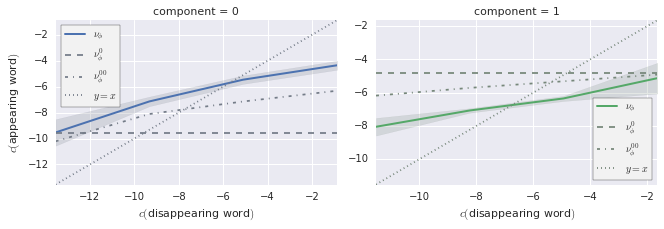

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1459 (cluster-unique) substitutions, but the PCA is in fact computed on 1163 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
    * global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 863 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07554179478047864

intercept                      5.083533
global_aoa                     0.023919
global_clustering             -0.070556
global_frequency               0.343079
global_letters_count          -0.002503
global_orthographic_density   -0.053057
global_synonyms_count         -0.029173
dtype: float64

Regressing global frequency with 863 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.09264280134434444

intercept                                              11.444985
global_aoa                                             -0.162748
global_clustering                                       1.514430
global_frequency                                        0.344817
global_letters_count                                   -0.596063
global_orthographic_density                             0.619156
globa

Regressing rel frequency with 863 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.25587826590396745

intercept                  -1.586471
rel_aoa                     0.036167
rel_clustering              0.060193
rel_frequency               0.622167
rel_letters_count          -0.114744
rel_orthographic_density   -0.228411
rel_synonyms_count          0.001505
dtype: float64

Regressing rel frequency with 863 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.27411721934408195

intercept                                       -1.628079
rel_aoa                                          0.020144
rel_clustering                                   0.032683
rel_frequency                                    0.653112
rel_letters_count                               -0.077194
rel_orthographic_density                        -0.337754
rel_synonyms_count                               0.367941
rel_aoa * rel_clustering                        -0.035450
rel_aoa * rel_frequency            

Regressing rel frequency with 863 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.40681553494928135

intercept                                                -25.448124
global_aoa                                                 1.954200
global_clustering                                         -3.814042
global_frequency                                           0.468756
global_letters_count                                      -0.987482
global_orthographic_density                                7.467211
global_synonyms_count                                      9.501353
rel_aoa                                                   -1.411610
rel_clustering                                             7.443880
rel_frequency                                              0.516238
rel_letters_count                                          0.585342
rel_orthographic_density                                  -4.754983
rel_synonyms_count                                        -5.578240
gl

Regressing global aoa with 795 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.06696652808984116

intercept                                        6.570977
rel_aoa                                         -0.131766
rel_clustering                                   0.022168
rel_frequency                                   -0.005377
rel_letters_count                               -0.022649
rel_orthographic_density                        -0.405473
rel_synonyms_count                              -0.295292
rel_aoa * rel_clustering                        -0.002721
rel_aoa * rel_frequency                         -0.063020
rel_aoa * rel_letters_count                      0.056194
rel_aoa * rel_orthographic_density               0.109012
rel_aoa * rel_synonyms_count                    -0.014010
rel_clustering * rel_frequency                   0.006294
rel_clustering * rel_letters_count               0.248903
rel_clustering * rel_orthographic_density        0.132983
rel_clustering * rel_s

Regressing rel aoa with 795 measures, no interactions
           ^^^^^^^
R^2 = 0.19831909547824667

intercept                      1.917121
global_aoa                    -0.424863
global_clustering             -0.110561
global_frequency              -0.031630
global_letters_count           0.165912
global_orthographic_density    0.013421
global_synonyms_count          0.165822
rel_aoa                        0.736364
rel_clustering                 0.220903
rel_frequency                 -0.061268
rel_letters_count             -0.138345
rel_orthographic_density      -0.082332
rel_synonyms_count            -0.403228
dtype: float64

Regressing rel aoa with 795 measures, with interactions
           ^^^^^^^
R^2 = 0.27642176883781155

intercept                                                 44.265407
global_aoa                                                -1.348925
global_clustering                                          3.454583
global_frequency                                          

Regressing global clustering with 695 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.023524486648381467

intercept                  -5.909797
rel_aoa                    -0.003583
rel_clustering              0.140697
rel_frequency              -0.012239
rel_letters_count           0.024761
rel_orthographic_density    0.029248
rel_synonyms_count         -0.041916
dtype: float64

Regressing global clustering with 695 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.04472029423044466

intercept                                       -5.903864
rel_aoa                                         -0.024464
rel_clustering                                   0.077778
rel_frequency                                   -0.022272
rel_letters_count                               -0.001624
rel_orthographic_density                         0.074121
rel_synonyms_count                              -0.092537
rel_aoa * rel_clustering                         0.064341
rel_aoa * rel_freq

Regressing rel clustering with 695 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.22994432347540428

intercept                     -2.329419
global_aoa                    -0.014345
global_clustering             -0.549852
global_frequency              -0.059926
global_letters_count          -0.001491
global_orthographic_density   -0.030981
global_synonyms_count         -0.054042
rel_aoa                       -0.002338
rel_clustering                 0.837942
rel_frequency                  0.035593
rel_letters_count              0.037297
rel_orthographic_density       0.064417
rel_synonyms_count             0.017429
dtype: float64

Regressing rel clustering with 695 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.3179767735198272

intercept                                                 19.916527
global_aoa                                                -0.529237
global_clustering                                          3.184514
global_frequency               

Regressing rel letters_count with 863 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.06122926768599457

intercept                                             -12.104509
global_aoa                                              0.750552
global_clustering                                      -2.666362
global_frequency                                        1.086721
global_letters_count                                    0.269934
global_orthographic_density                            -1.613496
global_synonyms_count                                  -1.523050
global_aoa * global_clustering                          0.165507
global_aoa * global_frequency                           0.019885
global_aoa * global_letters_count                      -0.009240
global_aoa * global_orthographic_density                0.072718
global_aoa * global_synonyms_count                     -0.051858
global_clustering * global_frequency                    0.200582
global_clustering * global_letter

Regressing global letters_count with 863 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.17483607823473324

intercept                                                 4.494470
global_aoa                                                0.945095
global_clustering                                        -1.813668
global_frequency                                          0.478084
global_letters_count                                     -0.710759
global_orthographic_density                              -8.038010
global_synonyms_count                                    -2.525586
rel_aoa                                                  -1.711433
rel_clustering                                           -5.218413
rel_frequency                                             0.758704
rel_letters_count                                         0.494506
rel_orthographic_density                                  3.508553
rel_synonyms_count                                       -2.155221
g

Regressing rel synonyms_count with 833 measures, no interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.020566580299250847

intercept                      0.011341
global_aoa                    -0.003261
global_clustering              0.005293
global_frequency              -0.005601
global_letters_count           0.013513
global_orthographic_density    0.032527
global_synonyms_count          0.137495
dtype: float64

Regressing rel synonyms_count with 833 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.040196284216821754

intercept                                              0.593246
global_aoa                                             0.068437
global_clustering                                      0.061723
global_frequency                                      -0.088940
global_letters_count                                  -0.031970
global_orthographic_density                           -0.233991
global_synonyms_count                                  0.026086
global_a

Regressing global synonyms_count with 833 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.03559917974871929

intercept                      1.632815
global_aoa                    -0.009948
global_clustering              0.121864
global_frequency              -0.026638
global_letters_count          -0.028758
global_orthographic_density   -0.014947
global_synonyms_count          0.079948
rel_aoa                        0.006349
rel_clustering                -0.125437
rel_frequency                  0.028682
rel_letters_count              0.045116
rel_orthographic_density       0.055815
rel_synonyms_count             0.097190
dtype: float64

Regressing global synonyms_count with 833 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.12322790979923691

intercept                                                 12.431519
global_aoa                                                -0.340013
global_clustering                                          2.291192
gl

Regressing global orthographic_density with 702 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10893664141577175

intercept                                              6.494923
global_aoa                                            -0.366595
global_clustering                                      1.019832
global_frequency                                      -0.110332
global_letters_count                                  -0.222601
global_orthographic_density                            0.333227
global_synonyms_count                                  0.563230
global_aoa * global_clustering                        -0.038658
global_aoa * global_frequency                          0.006555
global_aoa * global_letters_count                      0.001671
global_aoa * global_orthographic_density               0.037032
global_aoa * global_synonyms_count                     0.010037
global_clustering * global_frequency                  -0.040958
global_clustering * global

Regressing rel orthographic_density with 702 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.12078360956592592

intercept                                       -0.459745
rel_aoa                                          0.081781
rel_clustering                                  -0.022145
rel_frequency                                    0.057023
rel_letters_count                               -0.072286
rel_orthographic_density                         0.340347
rel_synonyms_count                               0.165083
rel_aoa * rel_clustering                         0.015383
rel_aoa * rel_frequency                          0.010147
rel_aoa * rel_letters_count                     -0.001501
rel_aoa * rel_orthographic_density               0.046920
rel_aoa * rel_synonyms_count                     0.039138
rel_clustering * rel_frequency                  -0.023805
rel_clustering * rel_letters_count              -0.035102
rel_clustering * rel_orthographic_density        0.0